# Intro

In this notebook we're going to build a computer vision model to detect brain tumors. In order to perform that, we'll be using [PyTorch](https://pytorch.org) and in particular we'll start from the [YOLOv5](https://github.com/ultralytics/yolov5) architecture to perform fine-tuning for this task. For building our models  we will use the medium version **YOLOv5m**.

Furthermore, we'll use this dataset from Kaggle called "[Brain Tumor Object Detection Dataset](https://www.kaggle.com/datasets/davidbroberts/brain-tumor-object-detection-datasets)" which already includes the labels and the bounding boxes that will be used to train the model.
It counts 1.274 images of MRI scans of the brain taken on 3 different axes:

| Axial       | Coronal     | Sagittal    |
| ----------- | ----------- | ----------- |
| 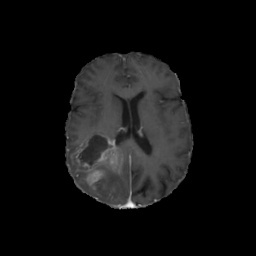      |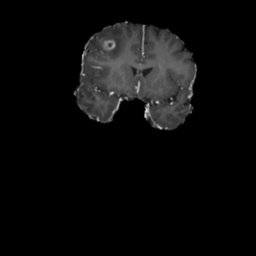        |      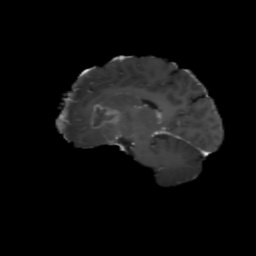       |


Note that this dataset has been already imported in this repository.

# Workspace Configuration

In [1]:
# Global imports
import shutil
import zipfile
import os
import torch
import urllib.request
from IPython.display import Image, display

In [2]:
# This block make sense only if runned on Google Collaboratory
if os.path.exists('sample_data'):
  shutil.rmtree('sample_data')

In [3]:
# Clone YOLOv5 Repository
if os.path.exists('yolov5'):
  shutil.rmtree('yolov5/runs')
else:
  !git clone https://github.com/ultralytics/yolov5 
  %cd yolov5
  %pip install -r requirements.txt
  %cd ..

Cloning into 'yolov5'...
remote: Enumerating objects: 12281, done.
remote: Total 12281 (delta 0), reused 0 (delta 0), pack-reused 12281
Receiving objects: 100% (12281/12281), 12.08 MiB | 19.24 MiB/s, done.
Resolving deltas: 100% (8476/8476), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 5.2 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
/content


In [4]:
# Download and unzip the dataset

if not os.path.isfile('data.zip'):
  urllib.request.urlretrieve("https://github.com/giuseppebrb/BrainTumorDetection/blob/main/data.zip?raw=true", "data.zip")

with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall(".")

os.remove('data.zip')

In [5]:
# Folder for fine-tuned models
output_folder = 'output_models'
if os.path.exists(output_folder):
  shutil.rmtree(output_folder)
else :
  os.makedirs(output_folder)

In [6]:
#  Check if cuda available / mps available / only CPU
if torch.cuda.is_available():
  device = 0
else:
  device = 'cpu'

# Training

## Axial Plane Model

In [ ]:
# Training axial plane
!python yolov5/train.py --img 480 --batch 64 --epochs 200 --data ./data/axial/axial.yaml --weights yolov5m.pt --device {device} --name axial --hyp ./data/augmentation.yaml

# Copy the fine-tuned model inside the output folder
shutil.copyfile('yolov5/runs/train/axial/weights/best.pt', f'{output_folder}/tumor_detector_axial.pt')

train: weights=yolov5m.pt, cfg=, data=./data/axial/axial.yaml, hyp=./data/augmentation.yaml, epochs=200, batch_size=64, imgsz=480, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=axial, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-394-gd7bc5d7 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=5.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.0, hsv_s=0

'output_models/tumor_detector_axial.pt'

### F1 Curve

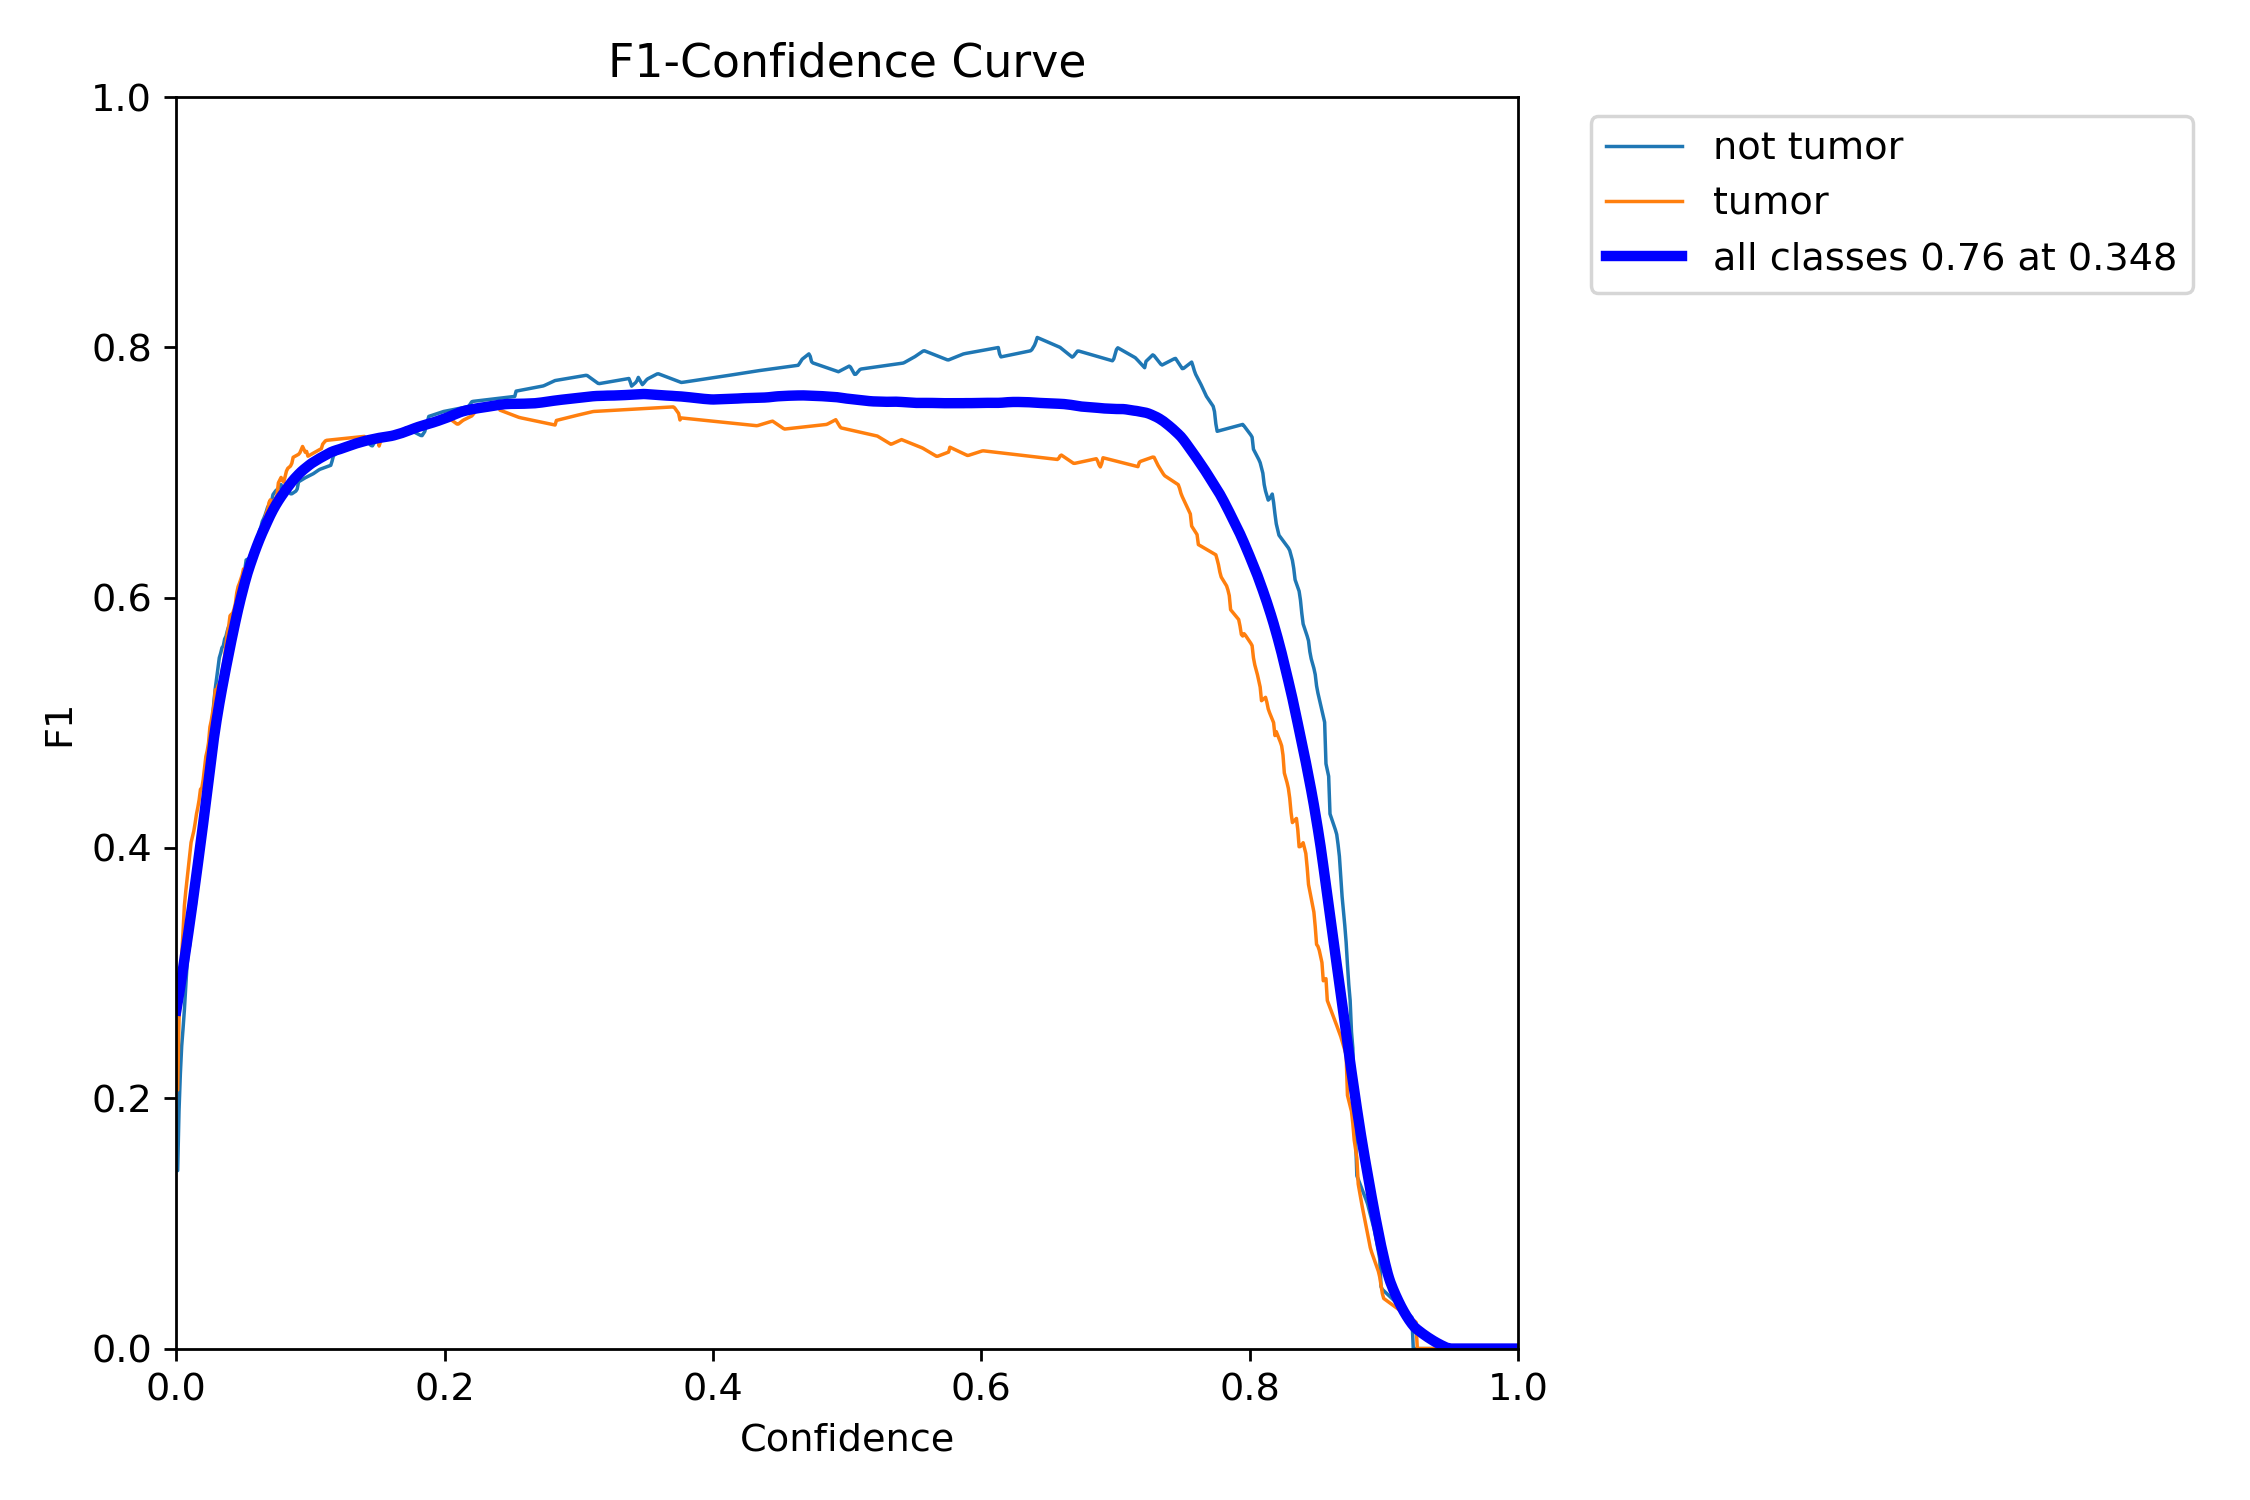

In [ ]:
display(Image(filename='yolov5/runs/train/axial/F1_curve.png'))

### PR Curve

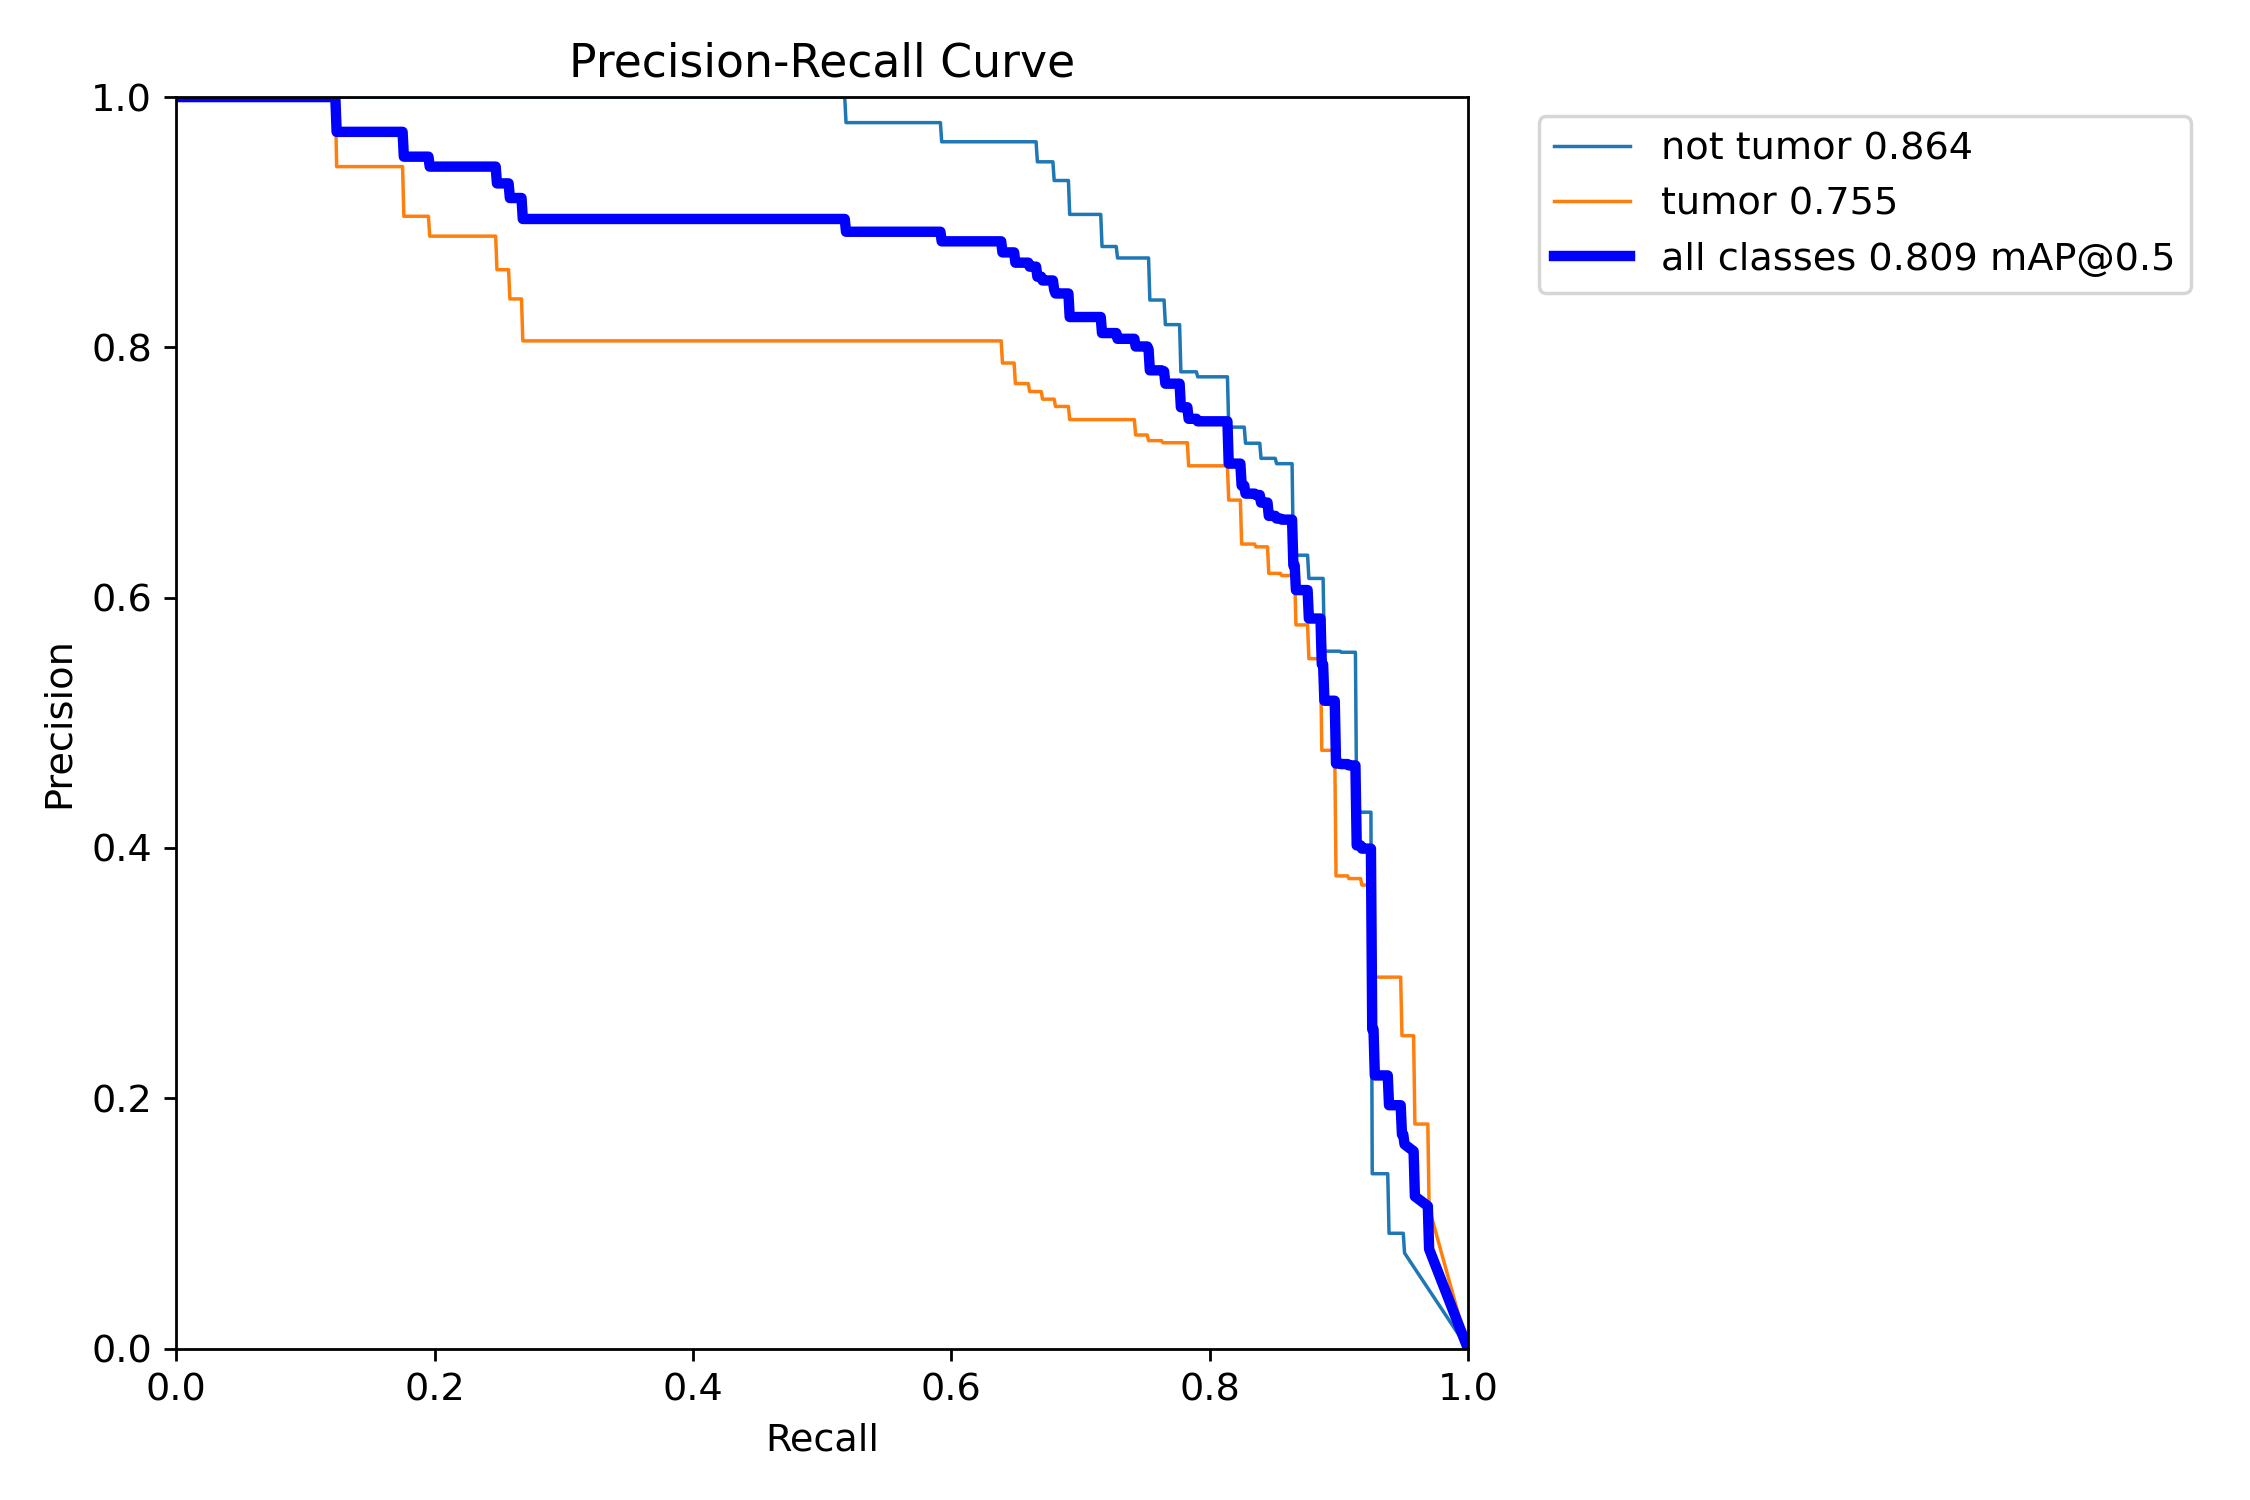

In [ ]:
display(Image(filename='yolov5/runs/train/axial/PR_curve.png'))

### Confusion Matrix

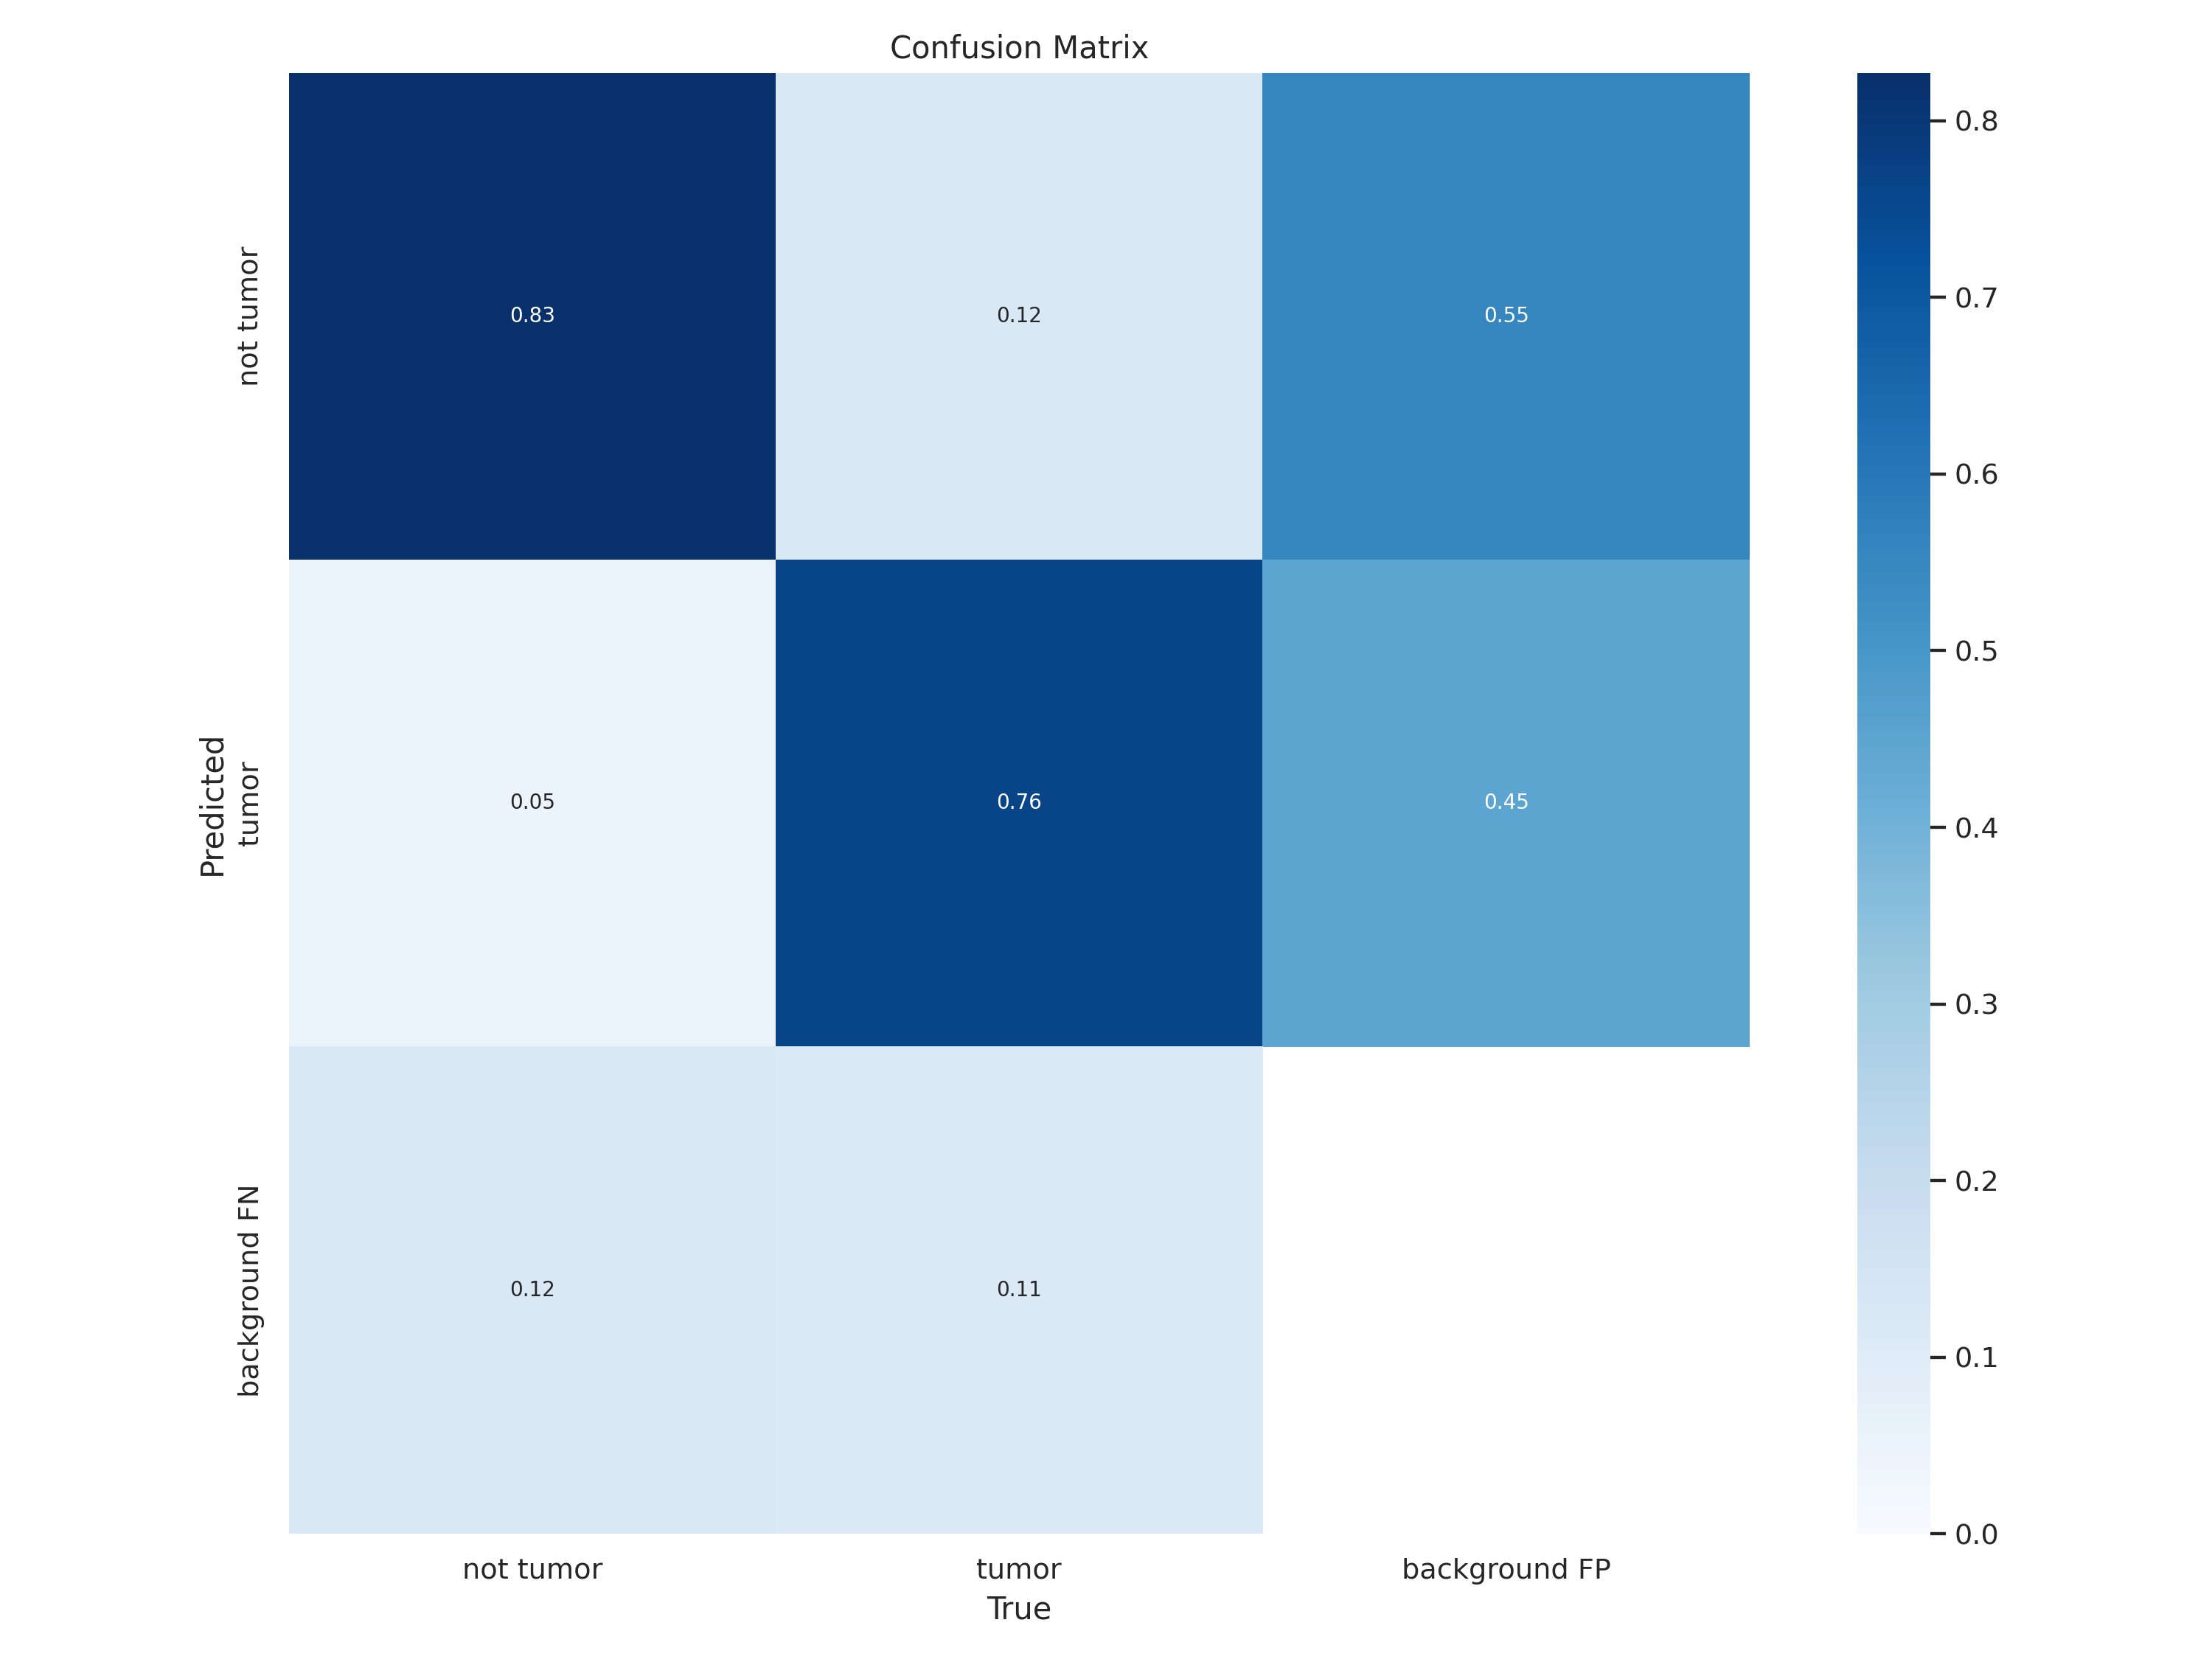

In [ ]:
display(Image(filename='yolov5/runs/train/axial/confusion_matrix.png'))

### Results summary

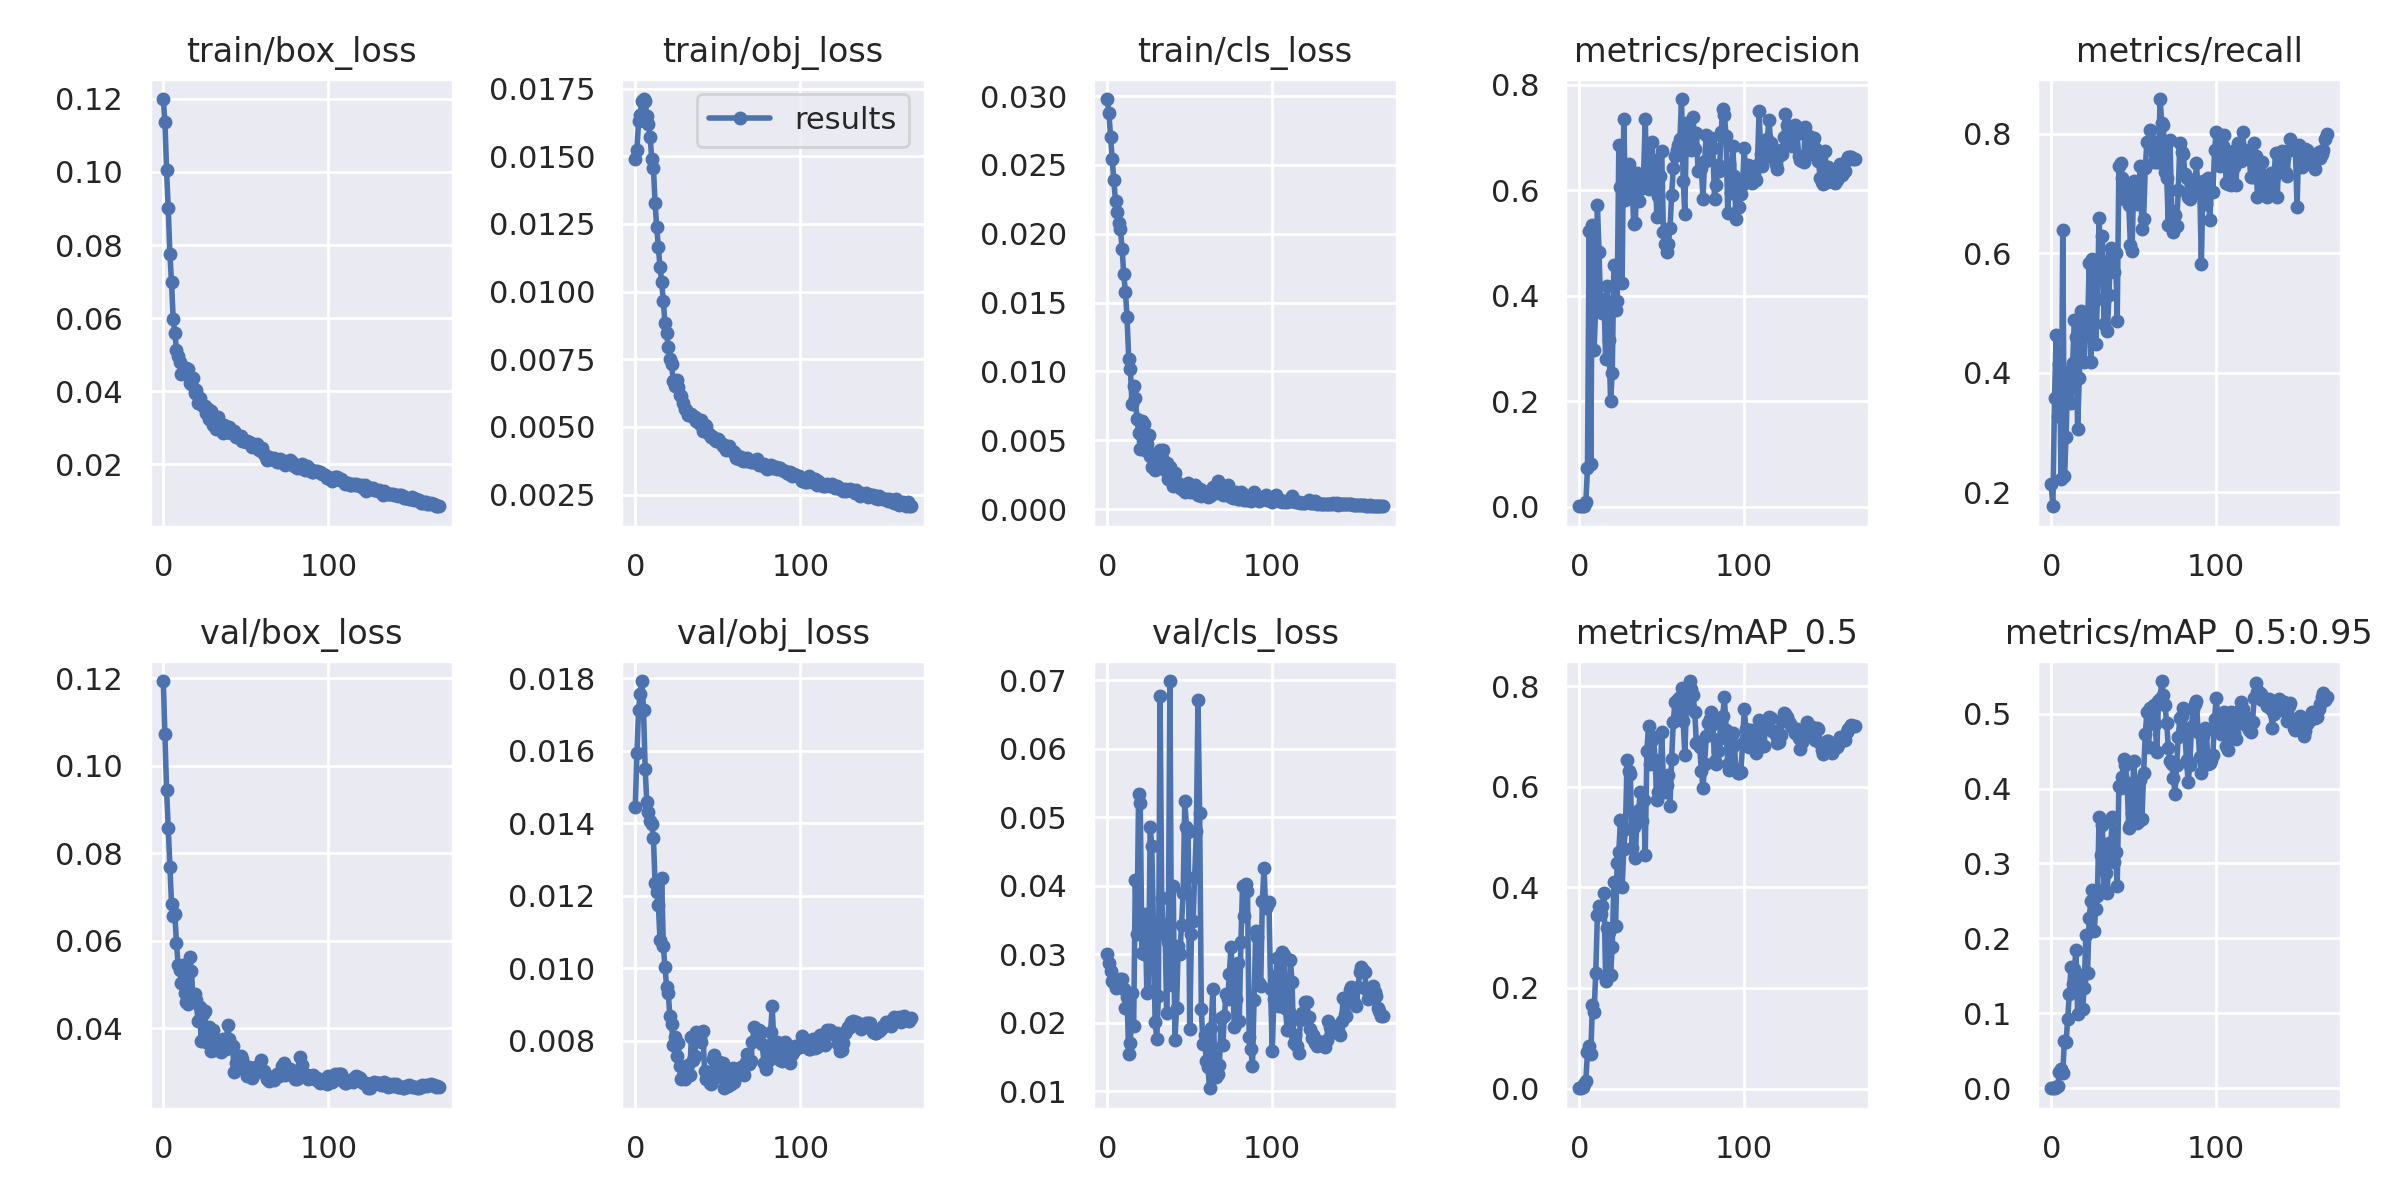

In [ ]:
display(Image(filename='yolov5/runs/train/axial/results.png'))

## Coronal Plane Model

In [12]:
# Training coronal plane
!python yolov5/train.py --img 640 --batch 80 --epochs 200 --data data/coronal/coronal.yaml --weights yolov5m.pt --device 0 --name coronal --hyp ./data/augmentation.yaml

# Copy the fine-tuned model inside the output folder
shutil.copyfile('yolov5/runs/train/coronal/weights/best.pt', f'{output_folder}/tumor_detector_coronal.pt')

train: weights=yolov5s.pt, cfg=, data=data/coronal/coronal.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=80, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=coronal, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-261-g19f33cb Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.0

'output_models/tumor_detector_coronal.pt'

### F1 Curve

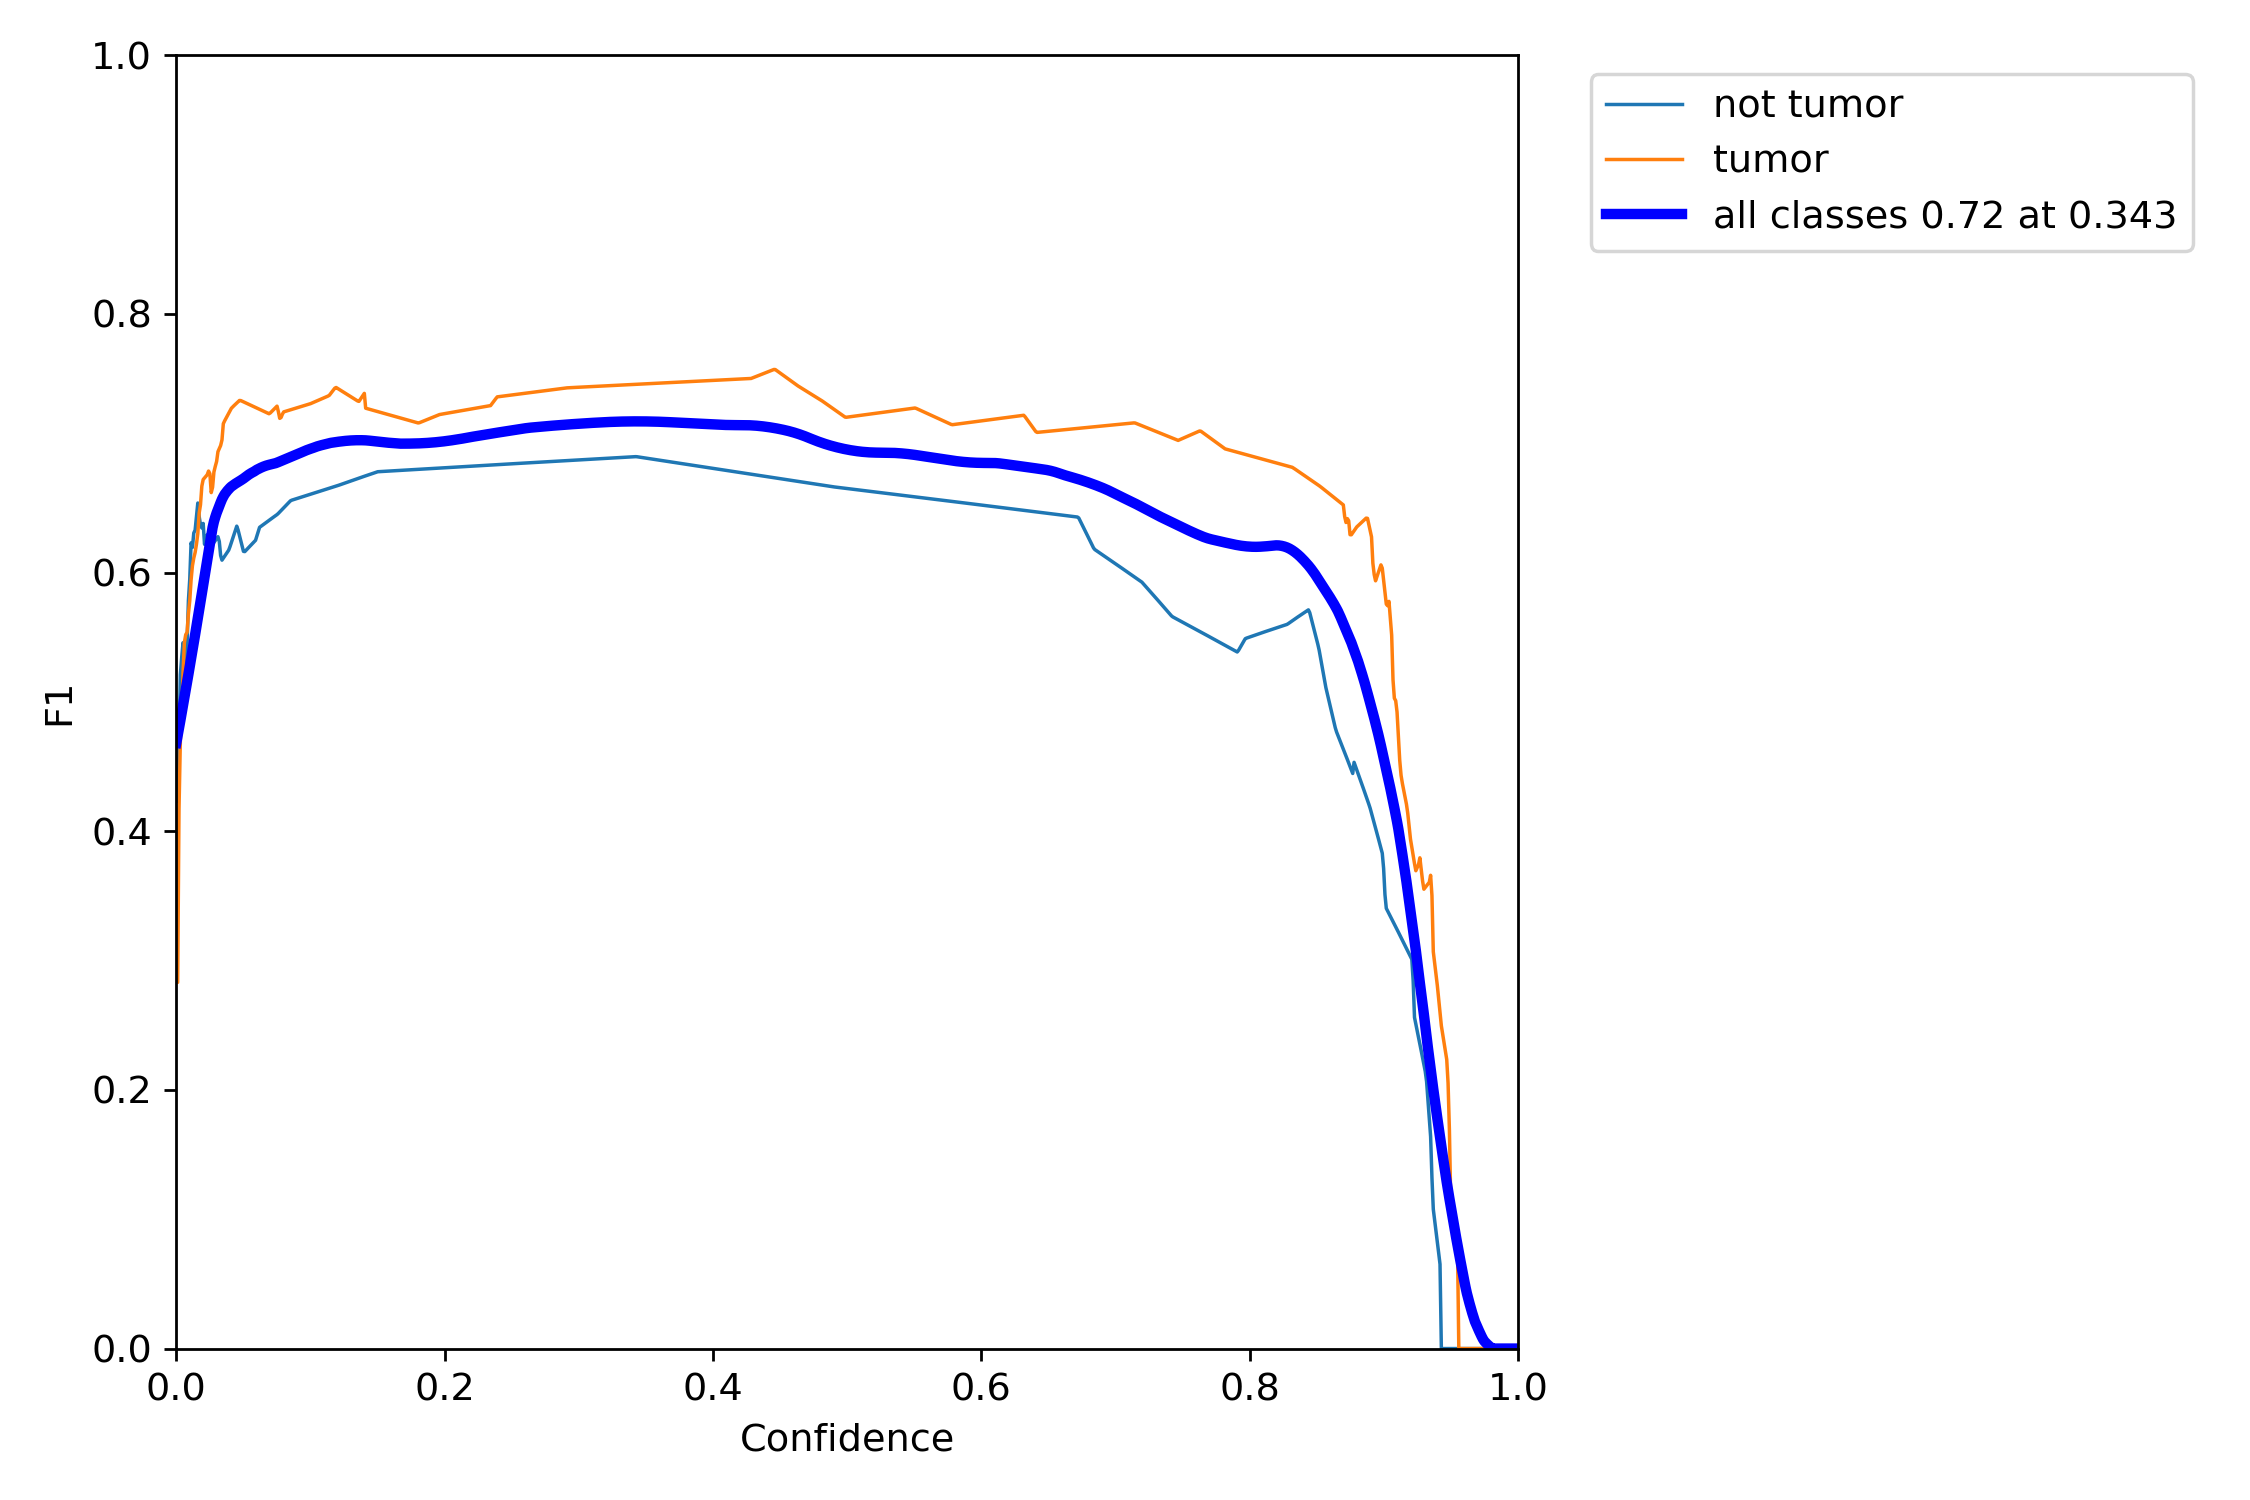

In [13]:
display(Image(filename='yolov5/runs/train/coronal/F1_curve.png'))

### PR Curve

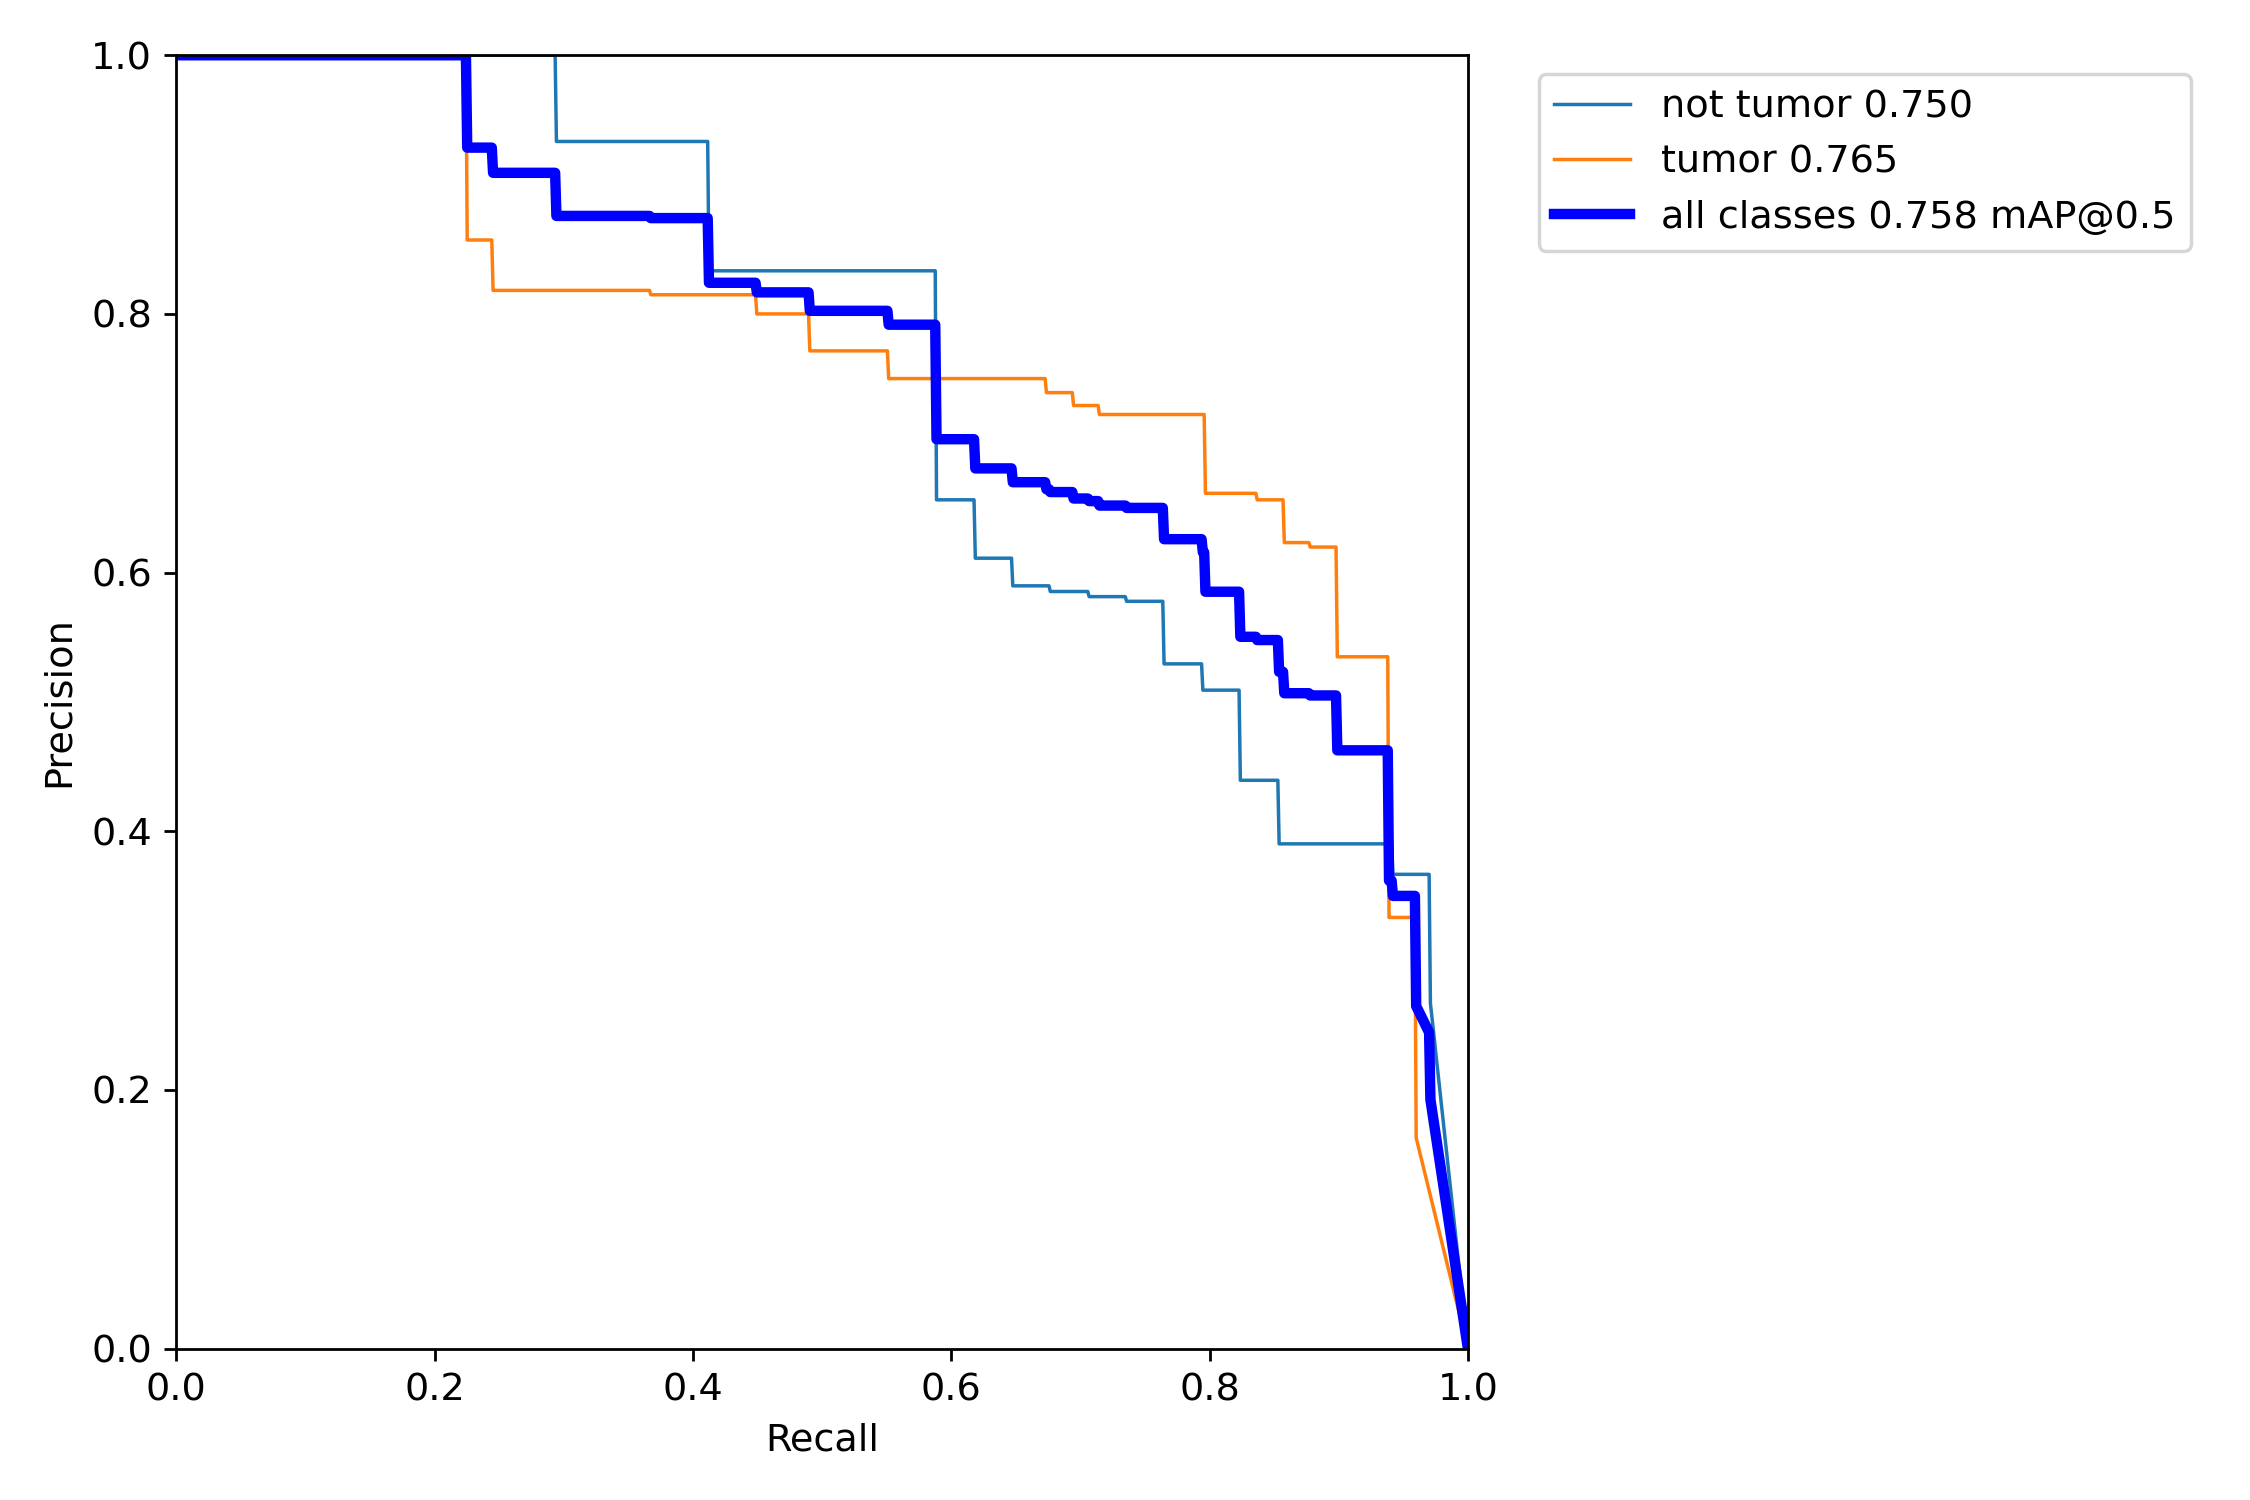

In [14]:
display(Image(filename='yolov5/runs/train/coronal/PR_curve.png'))

### Confusion Matrix

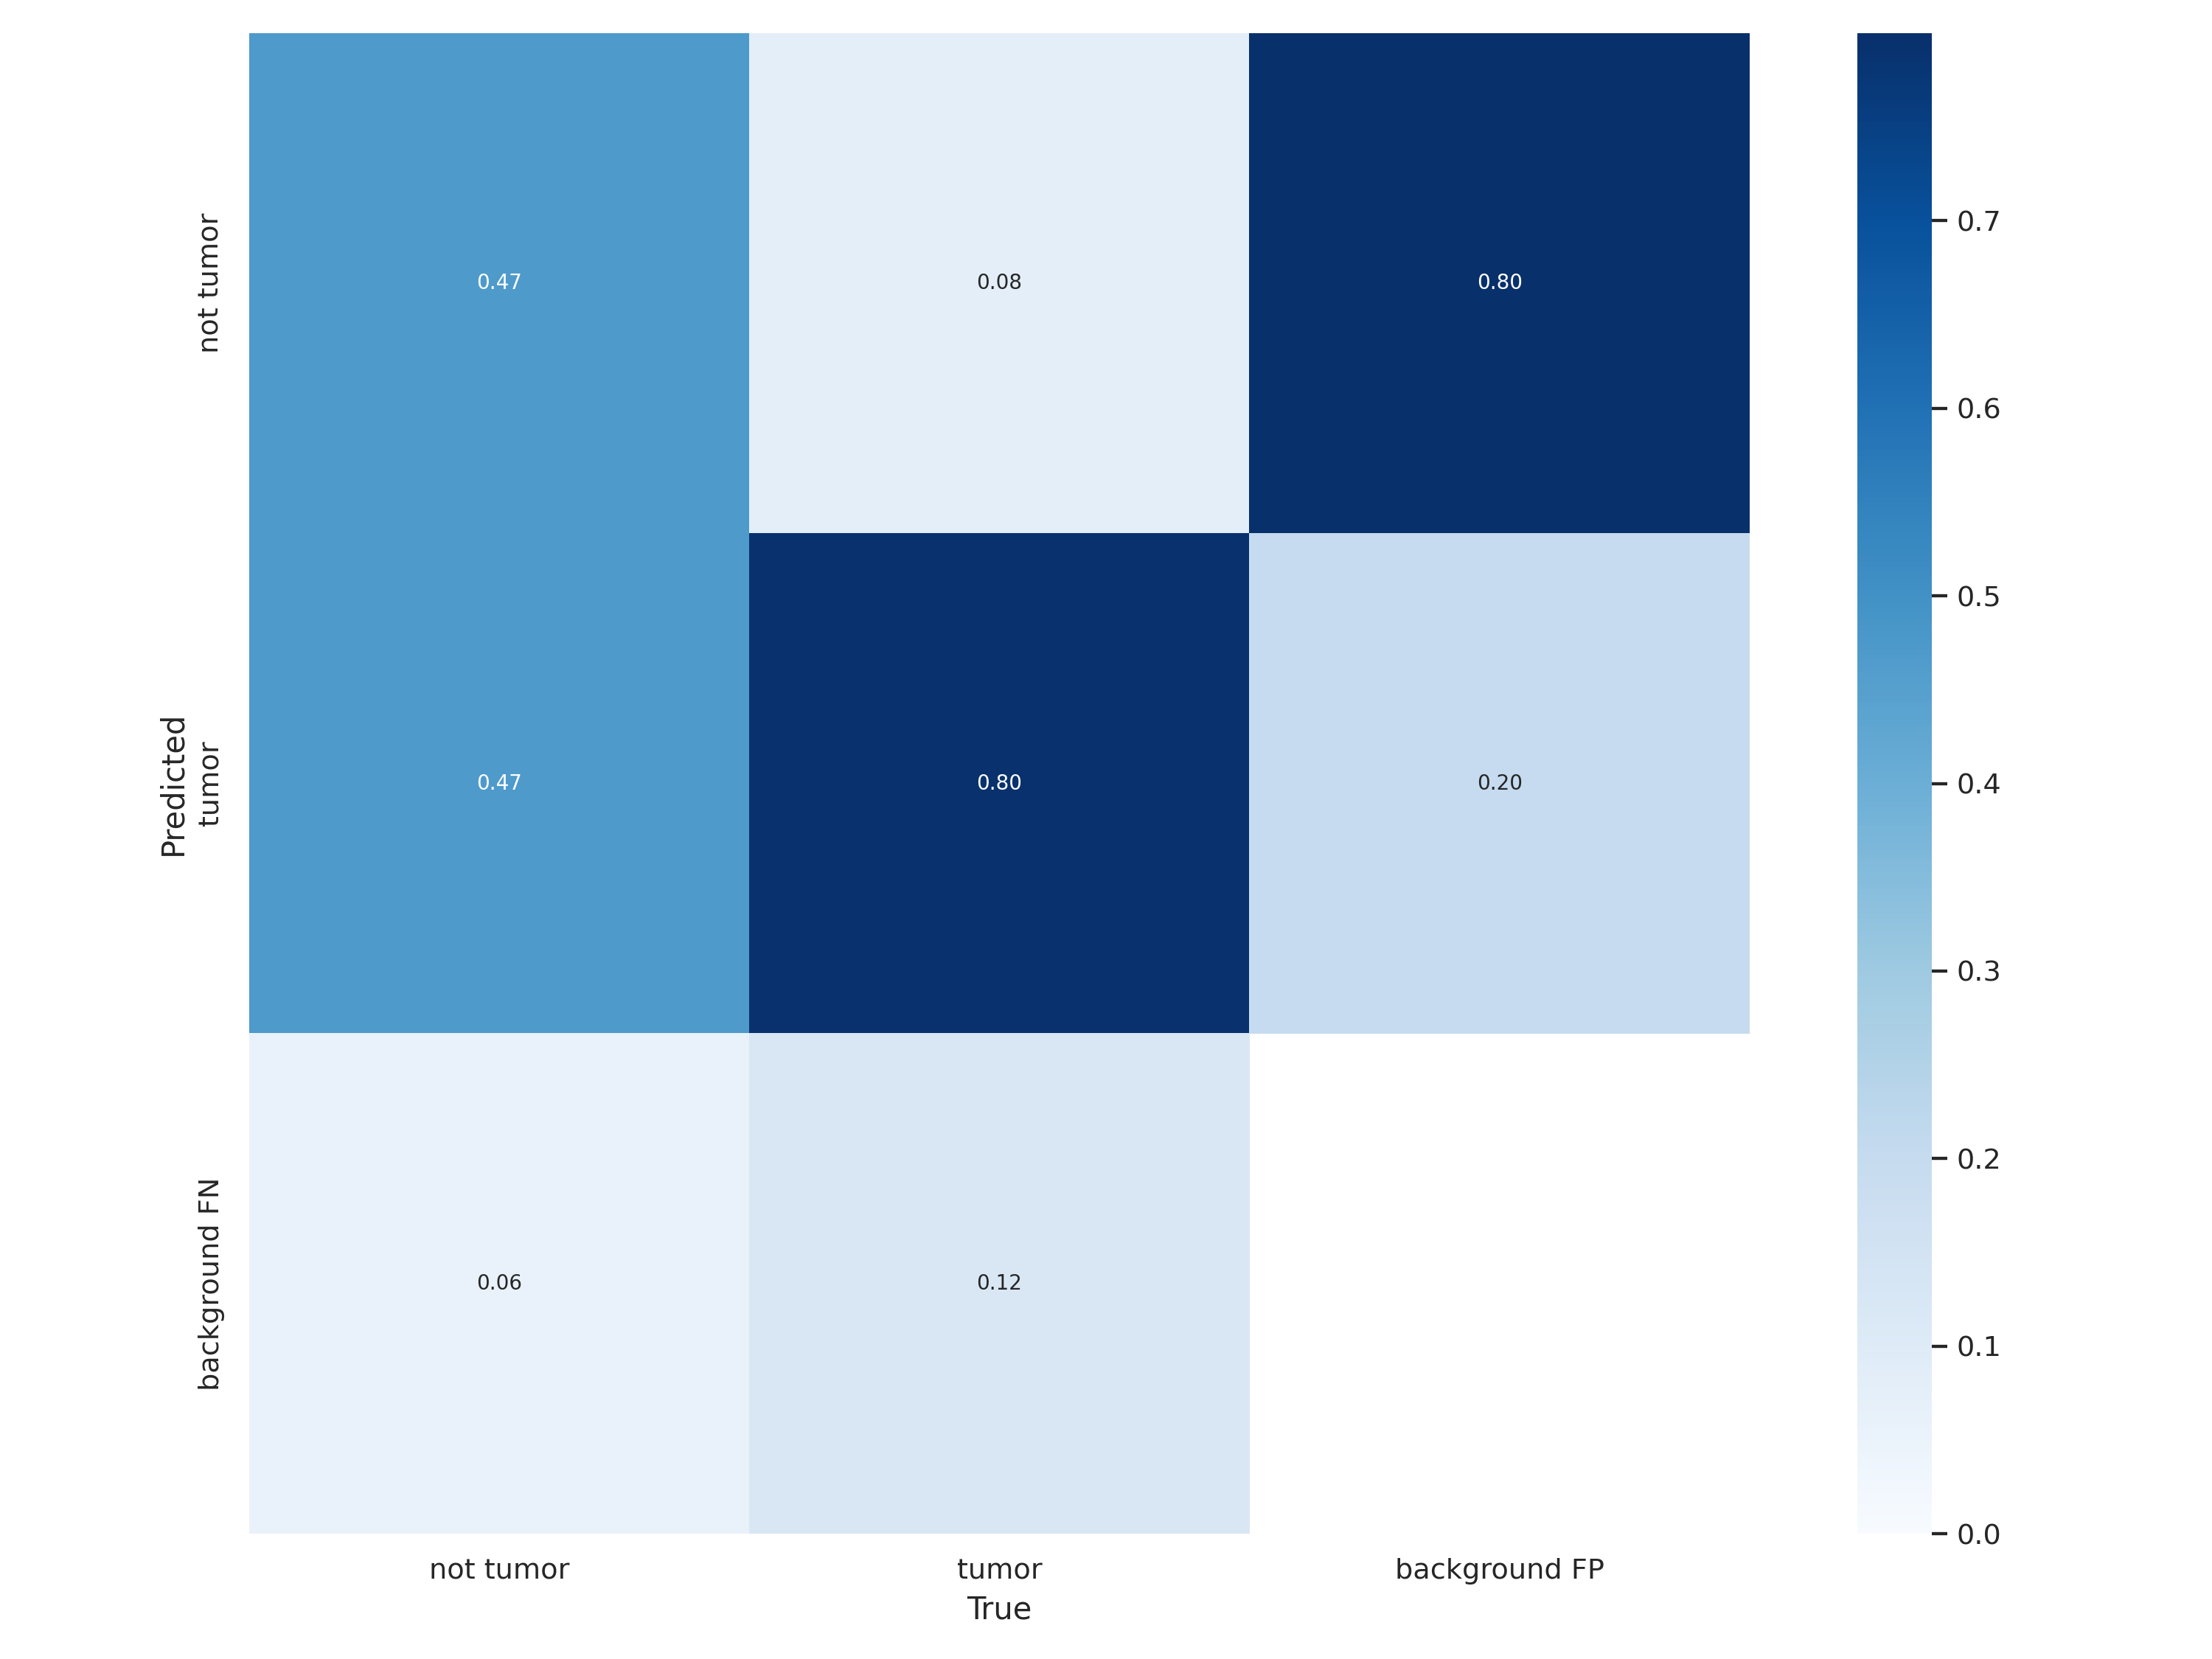

In [15]:
display(Image(filename='yolov5/runs/train/coronal/confusion_matrix.png'))

### Results Summary

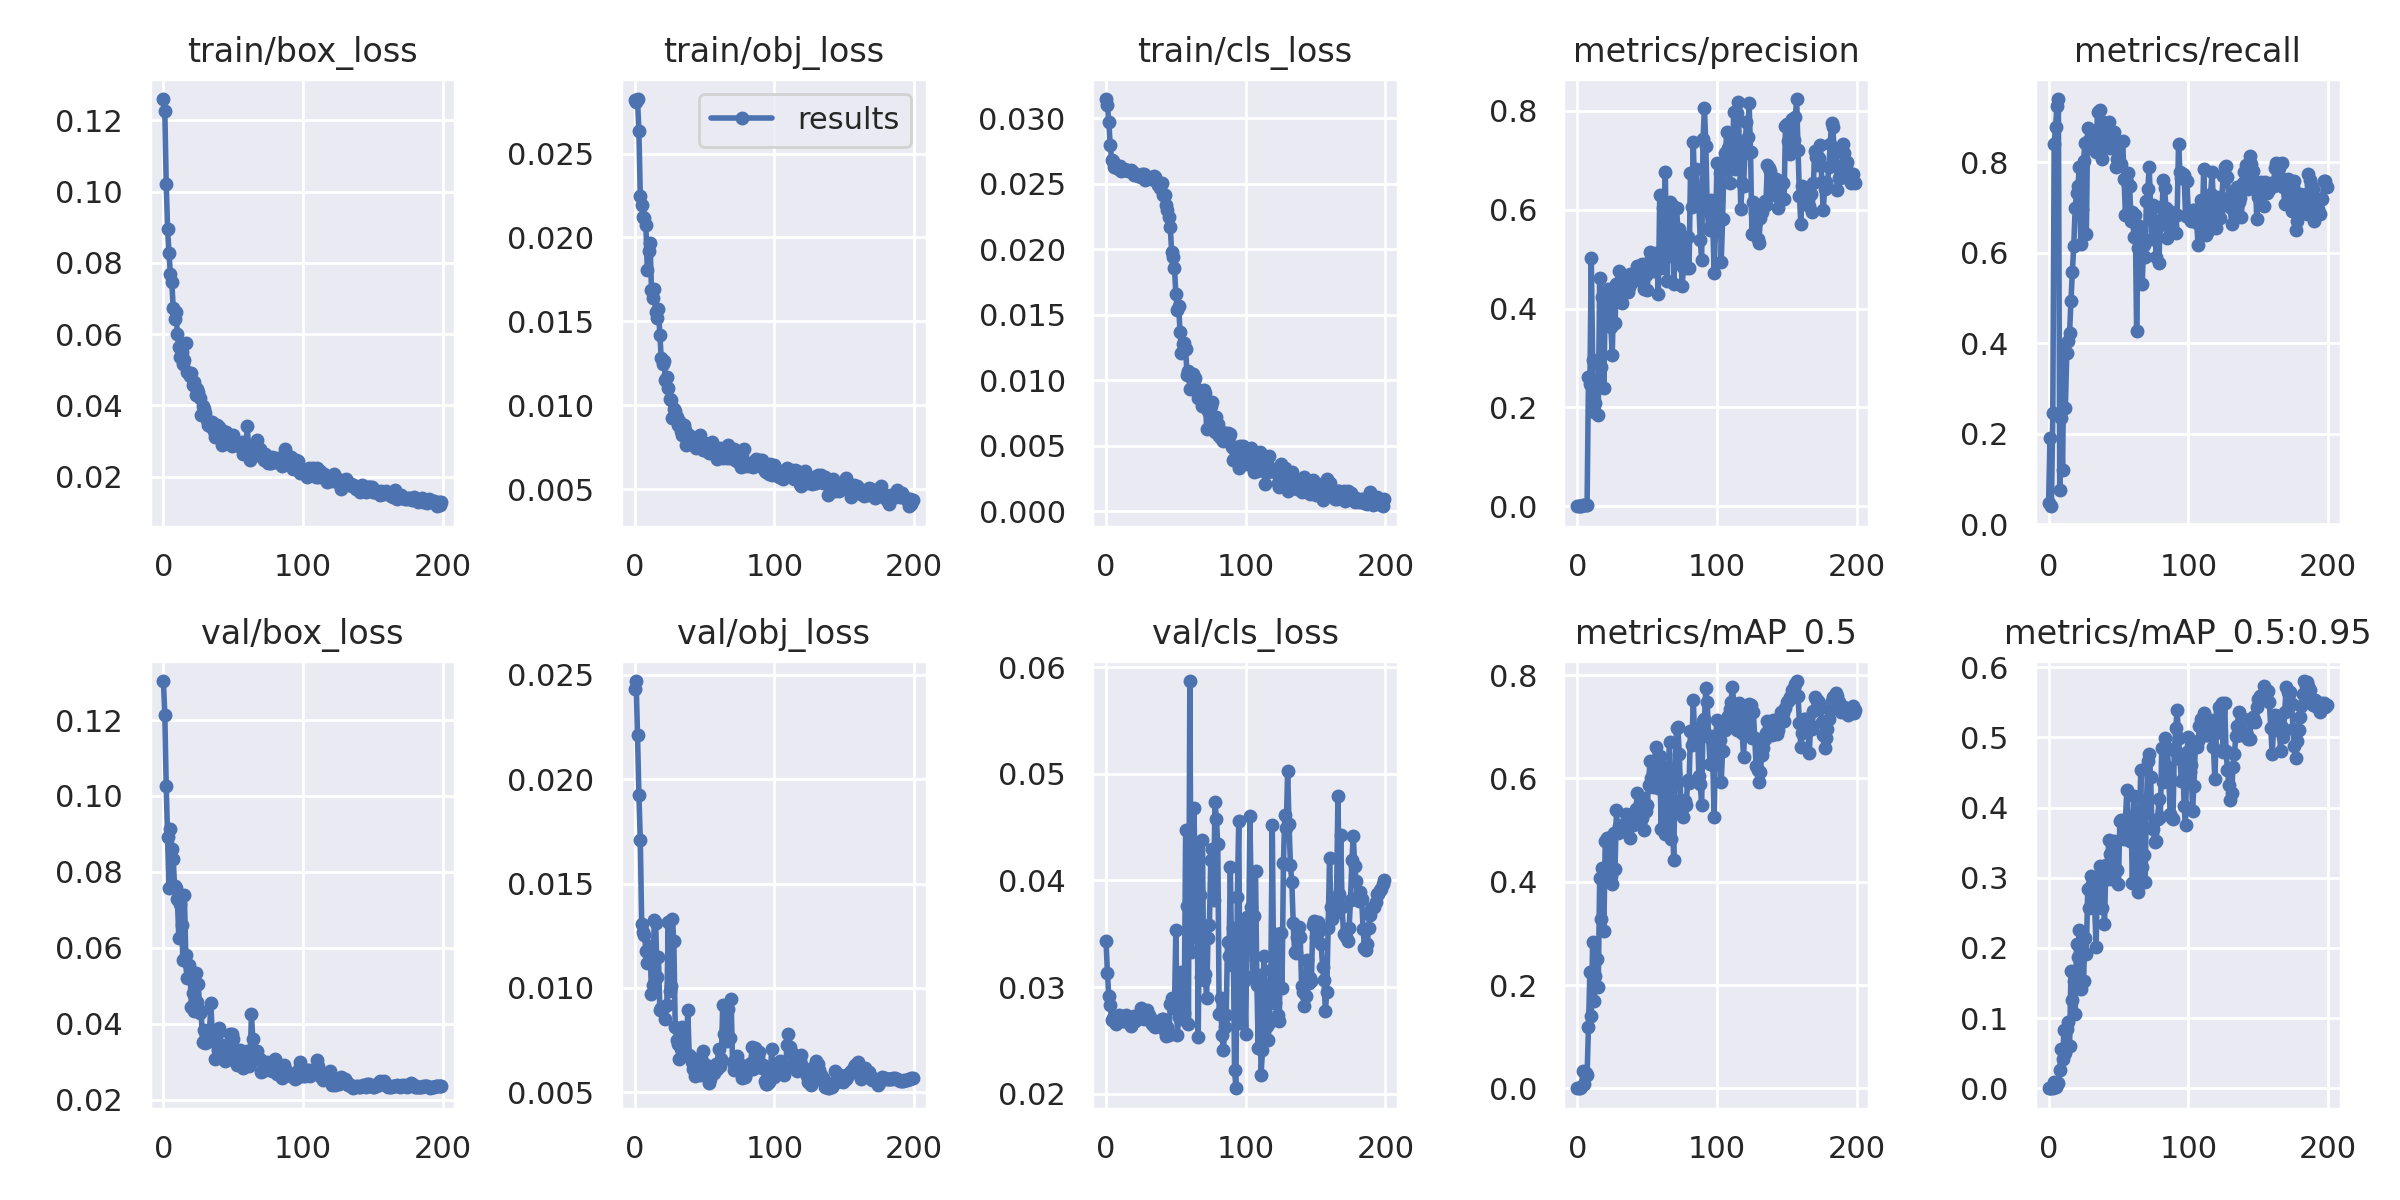

In [16]:
display(Image(filename='yolov5/runs/train/coronal/results.png'))

## Sagittal Plane Model

In [17]:
# Training sagittal plane
!python yolov5/train.py --img 640 --batch 80 --epochs 200 --data data/sagittal/sagittal.yaml --weights yolov5m.pt --device 0 --name sagittal --hyp ./data/augmentation.yaml

# Copy the fine-tuned model inside the output folder
shutil.copyfile('yolov5/runs/train/sagittal/weights/best.pt', f'{output_folder}/tumor_detector_sagittal.pt')

train: weights=yolov5s.pt, cfg=, data=data/sagittal/sagittal.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=80, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=sagittal, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-261-g19f33cb Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=

'output_models/tumor_detector_sagittal.pt'

### F1 Curve

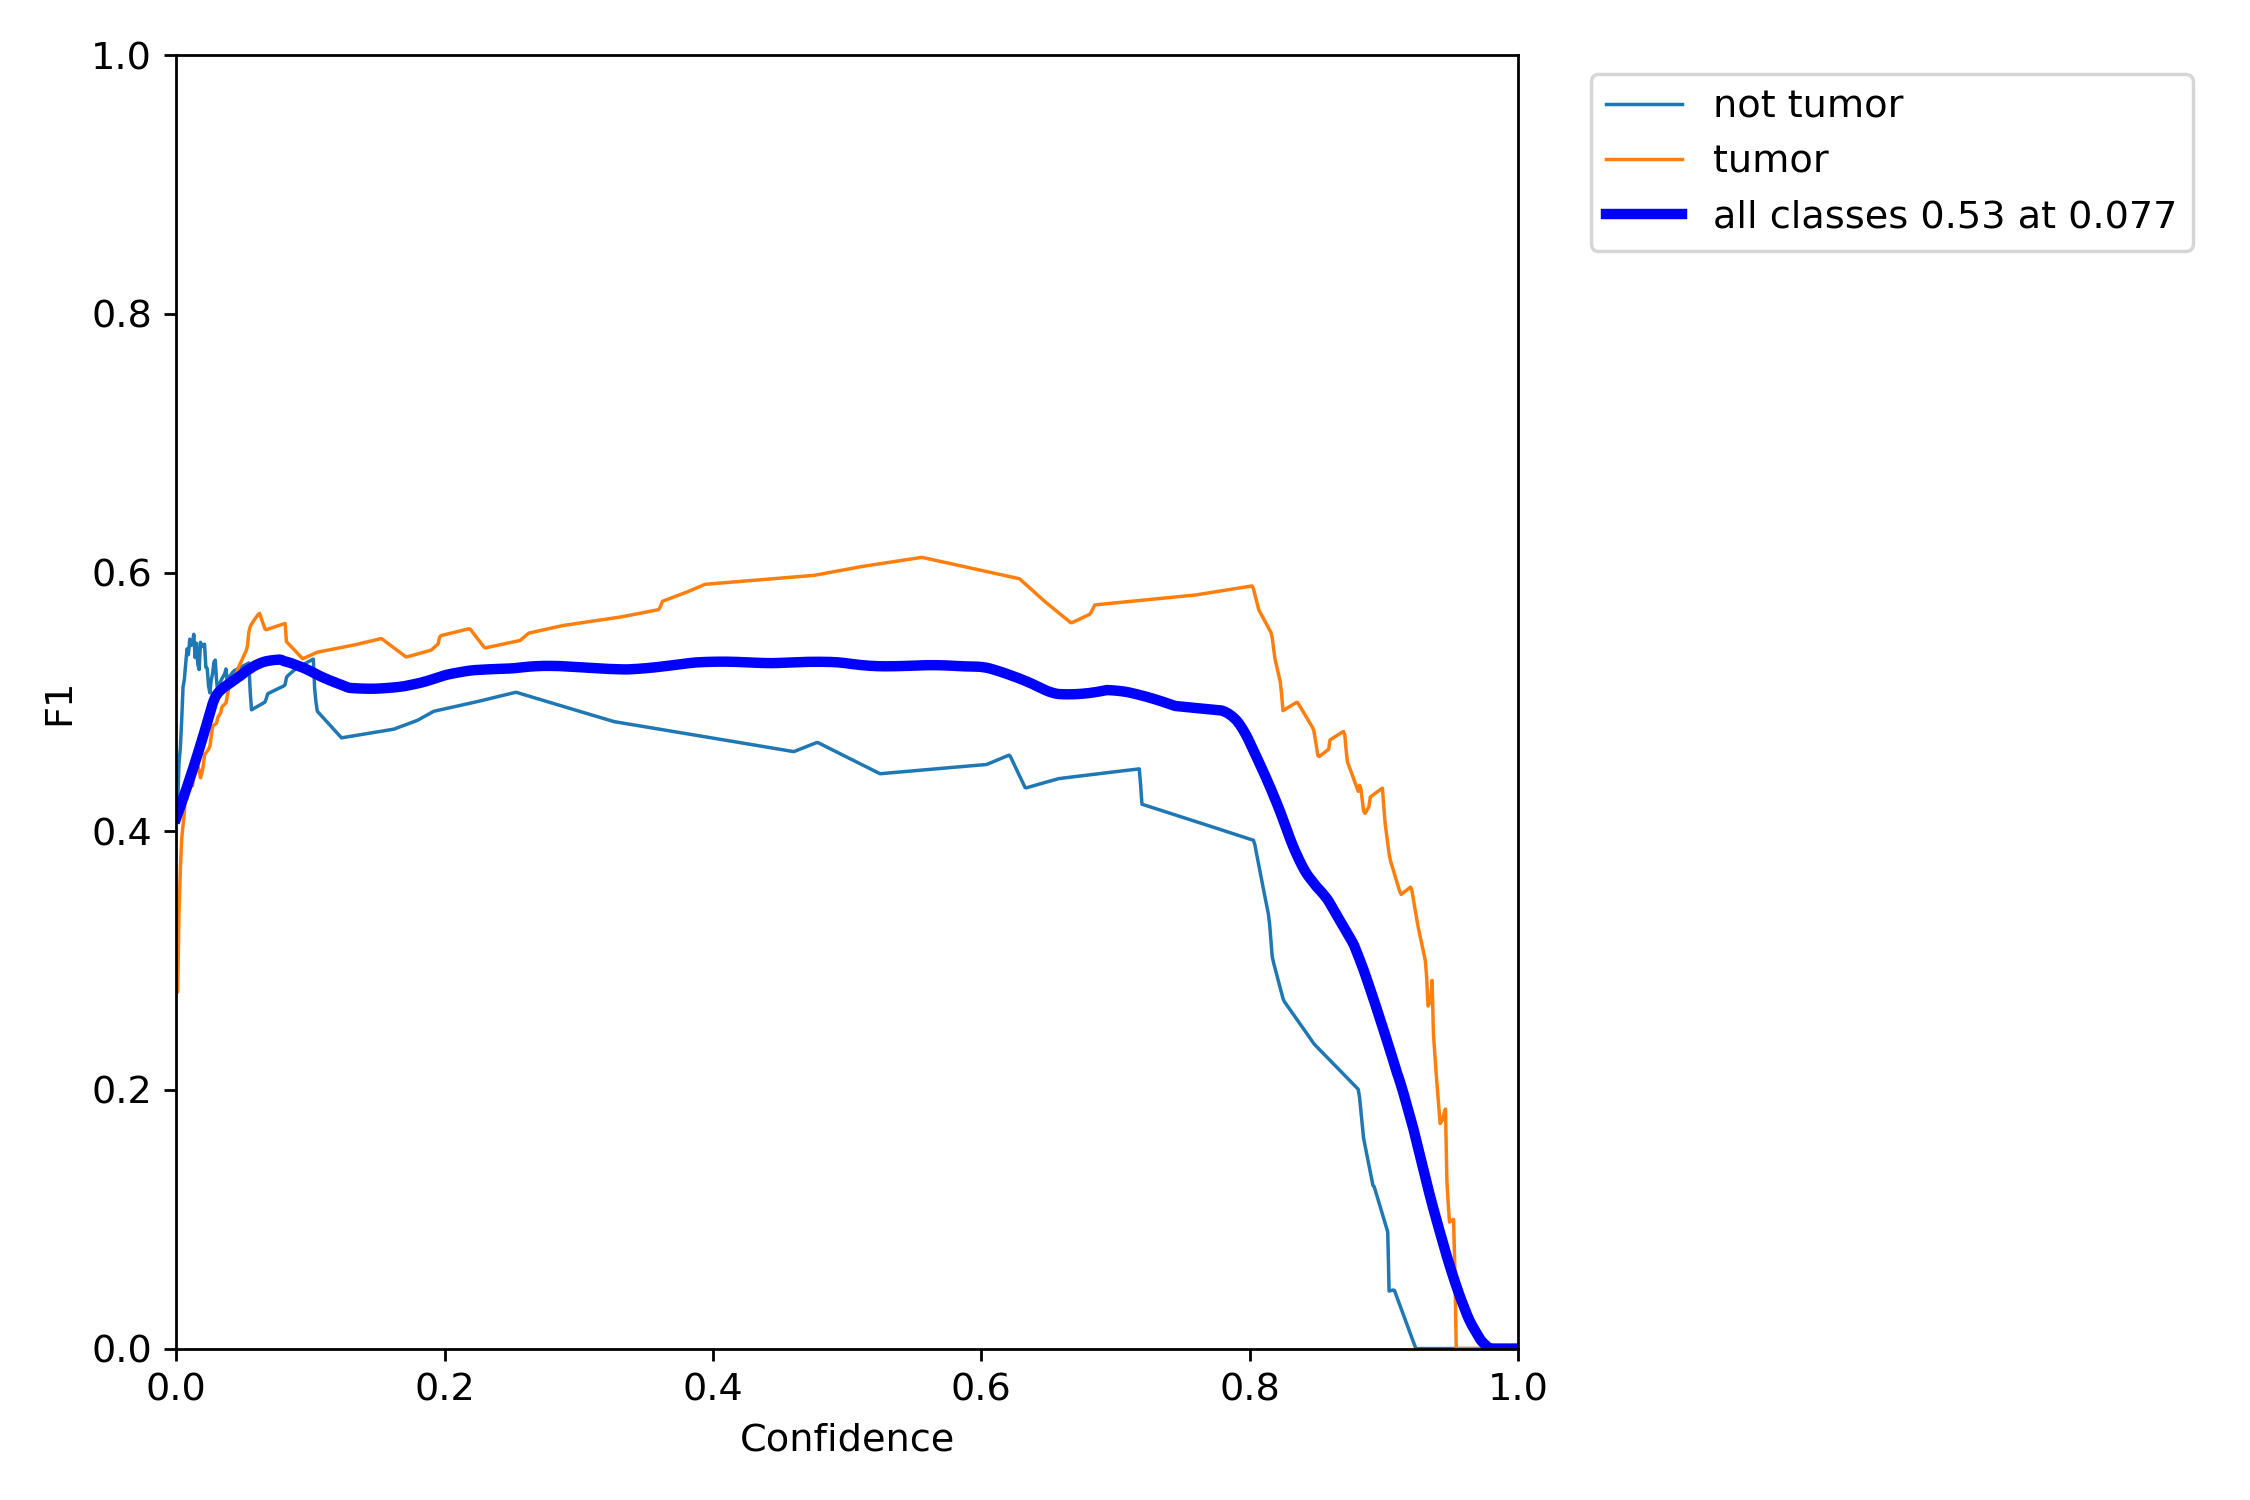

In [18]:
display(Image(filename='yolov5/runs/train/sagittal/F1_curve.png'))

### PR Curve

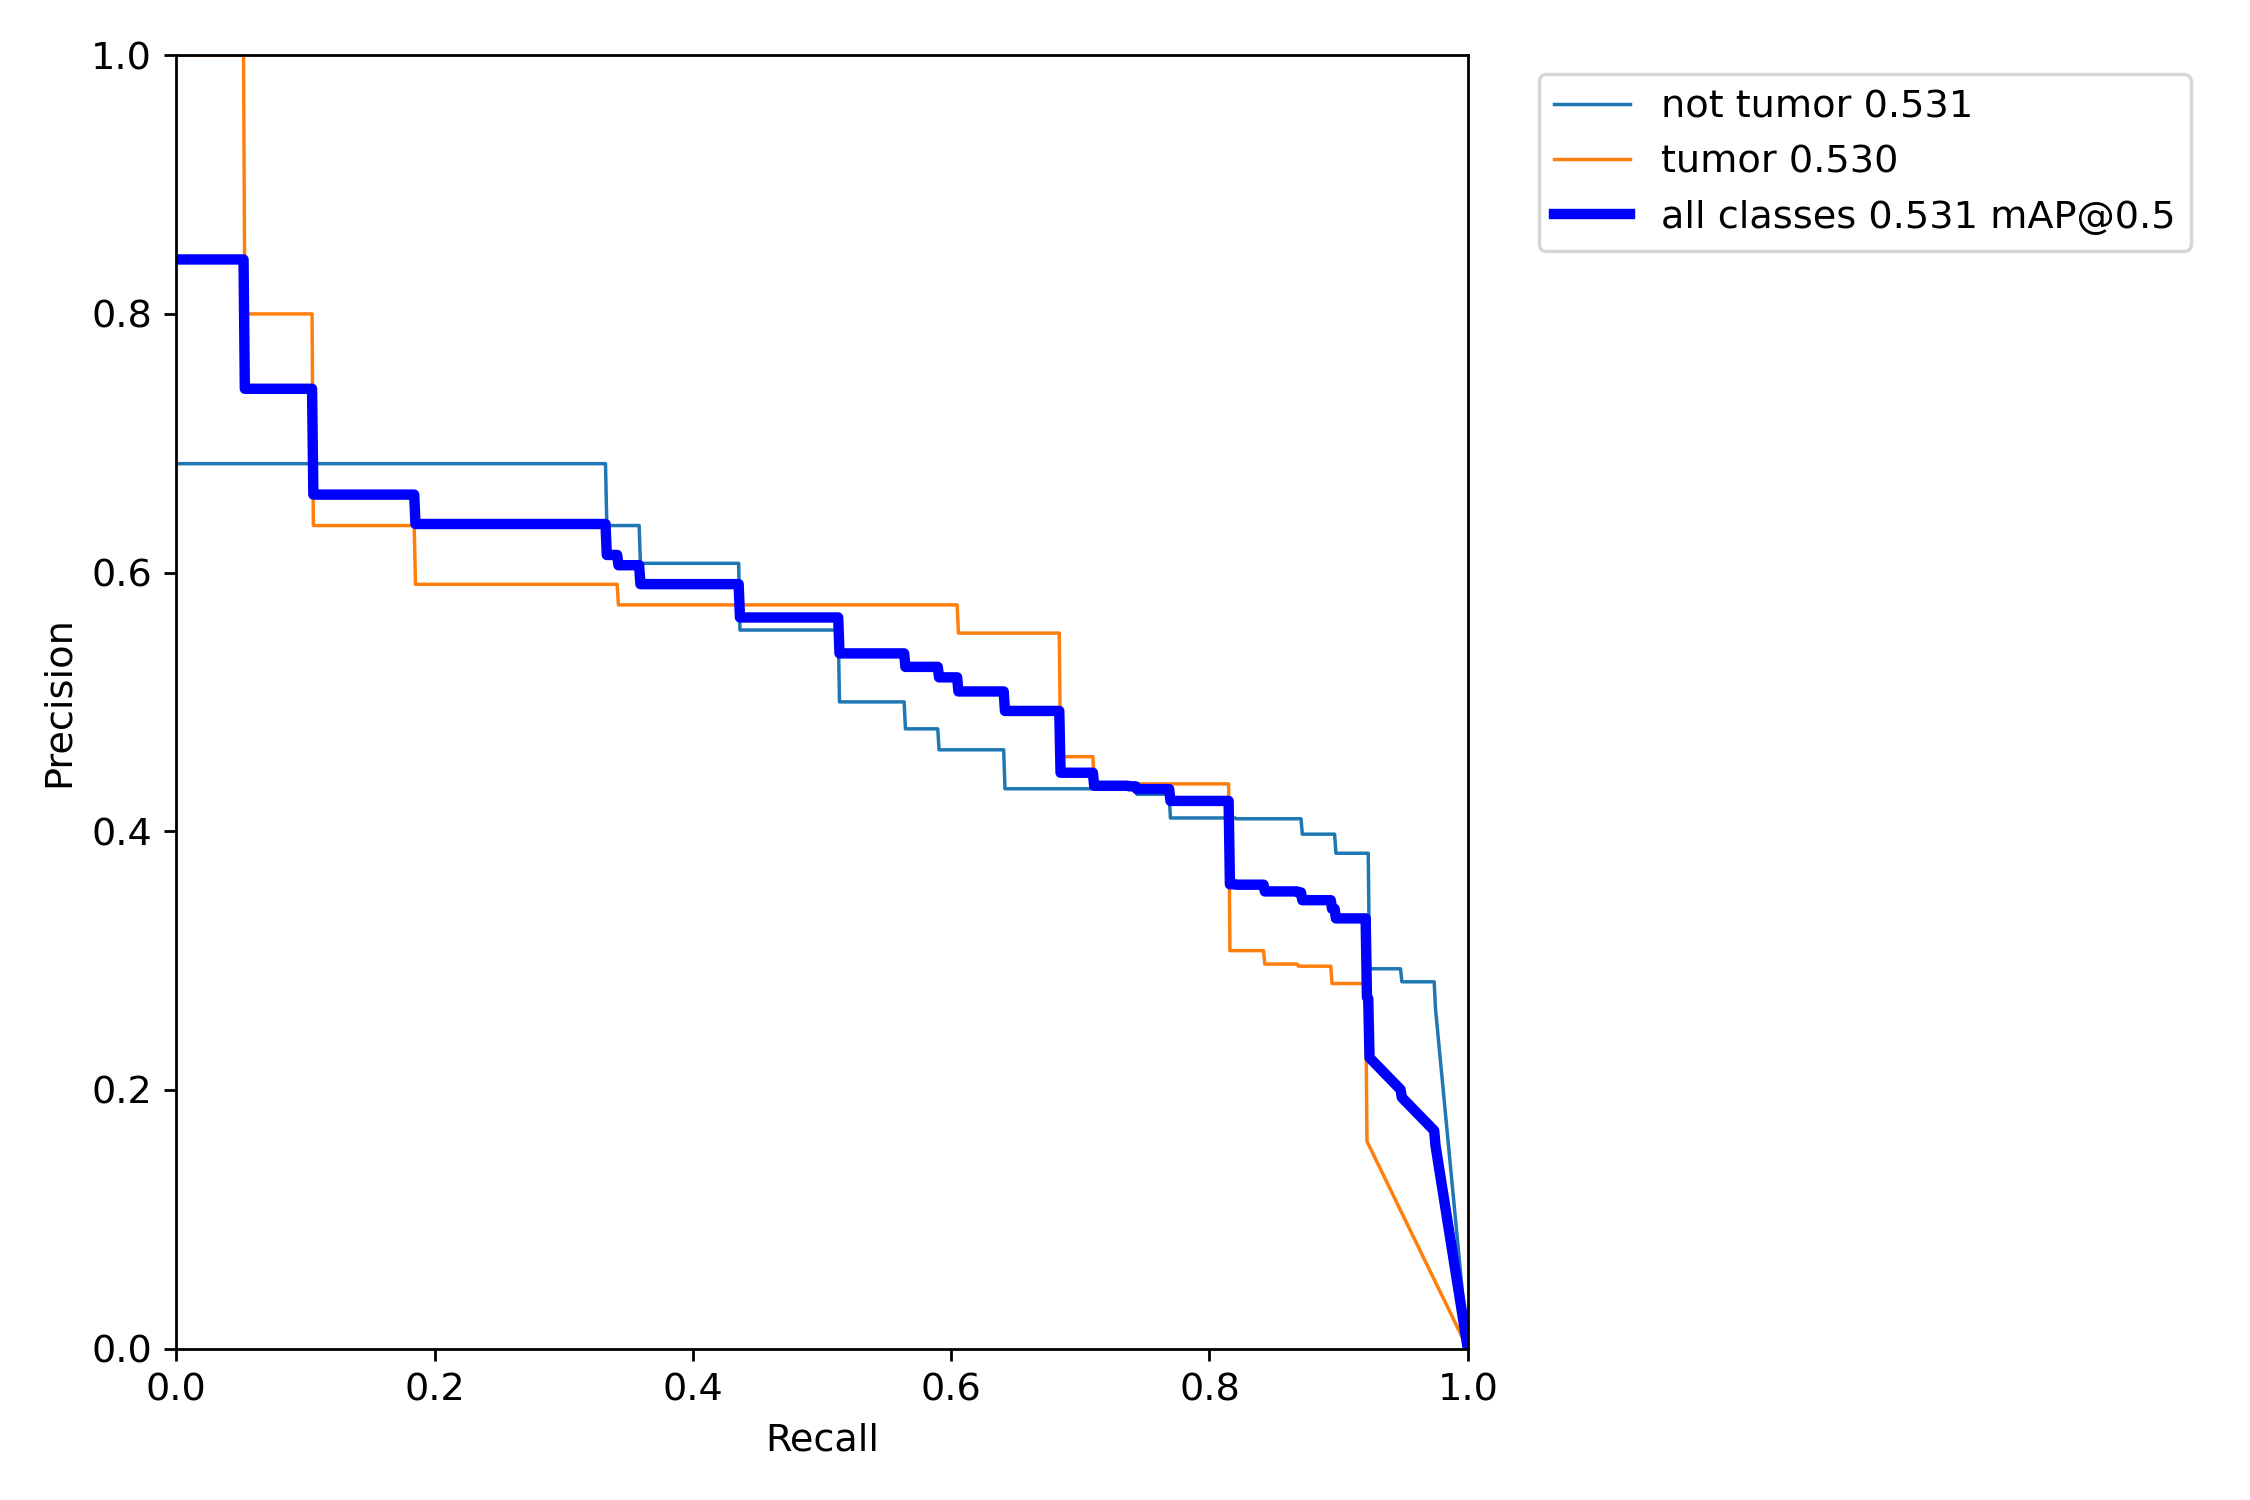

In [19]:
display(Image(filename='yolov5/runs/train/sagittal/PR_curve.png'))

### Confusion Matrix

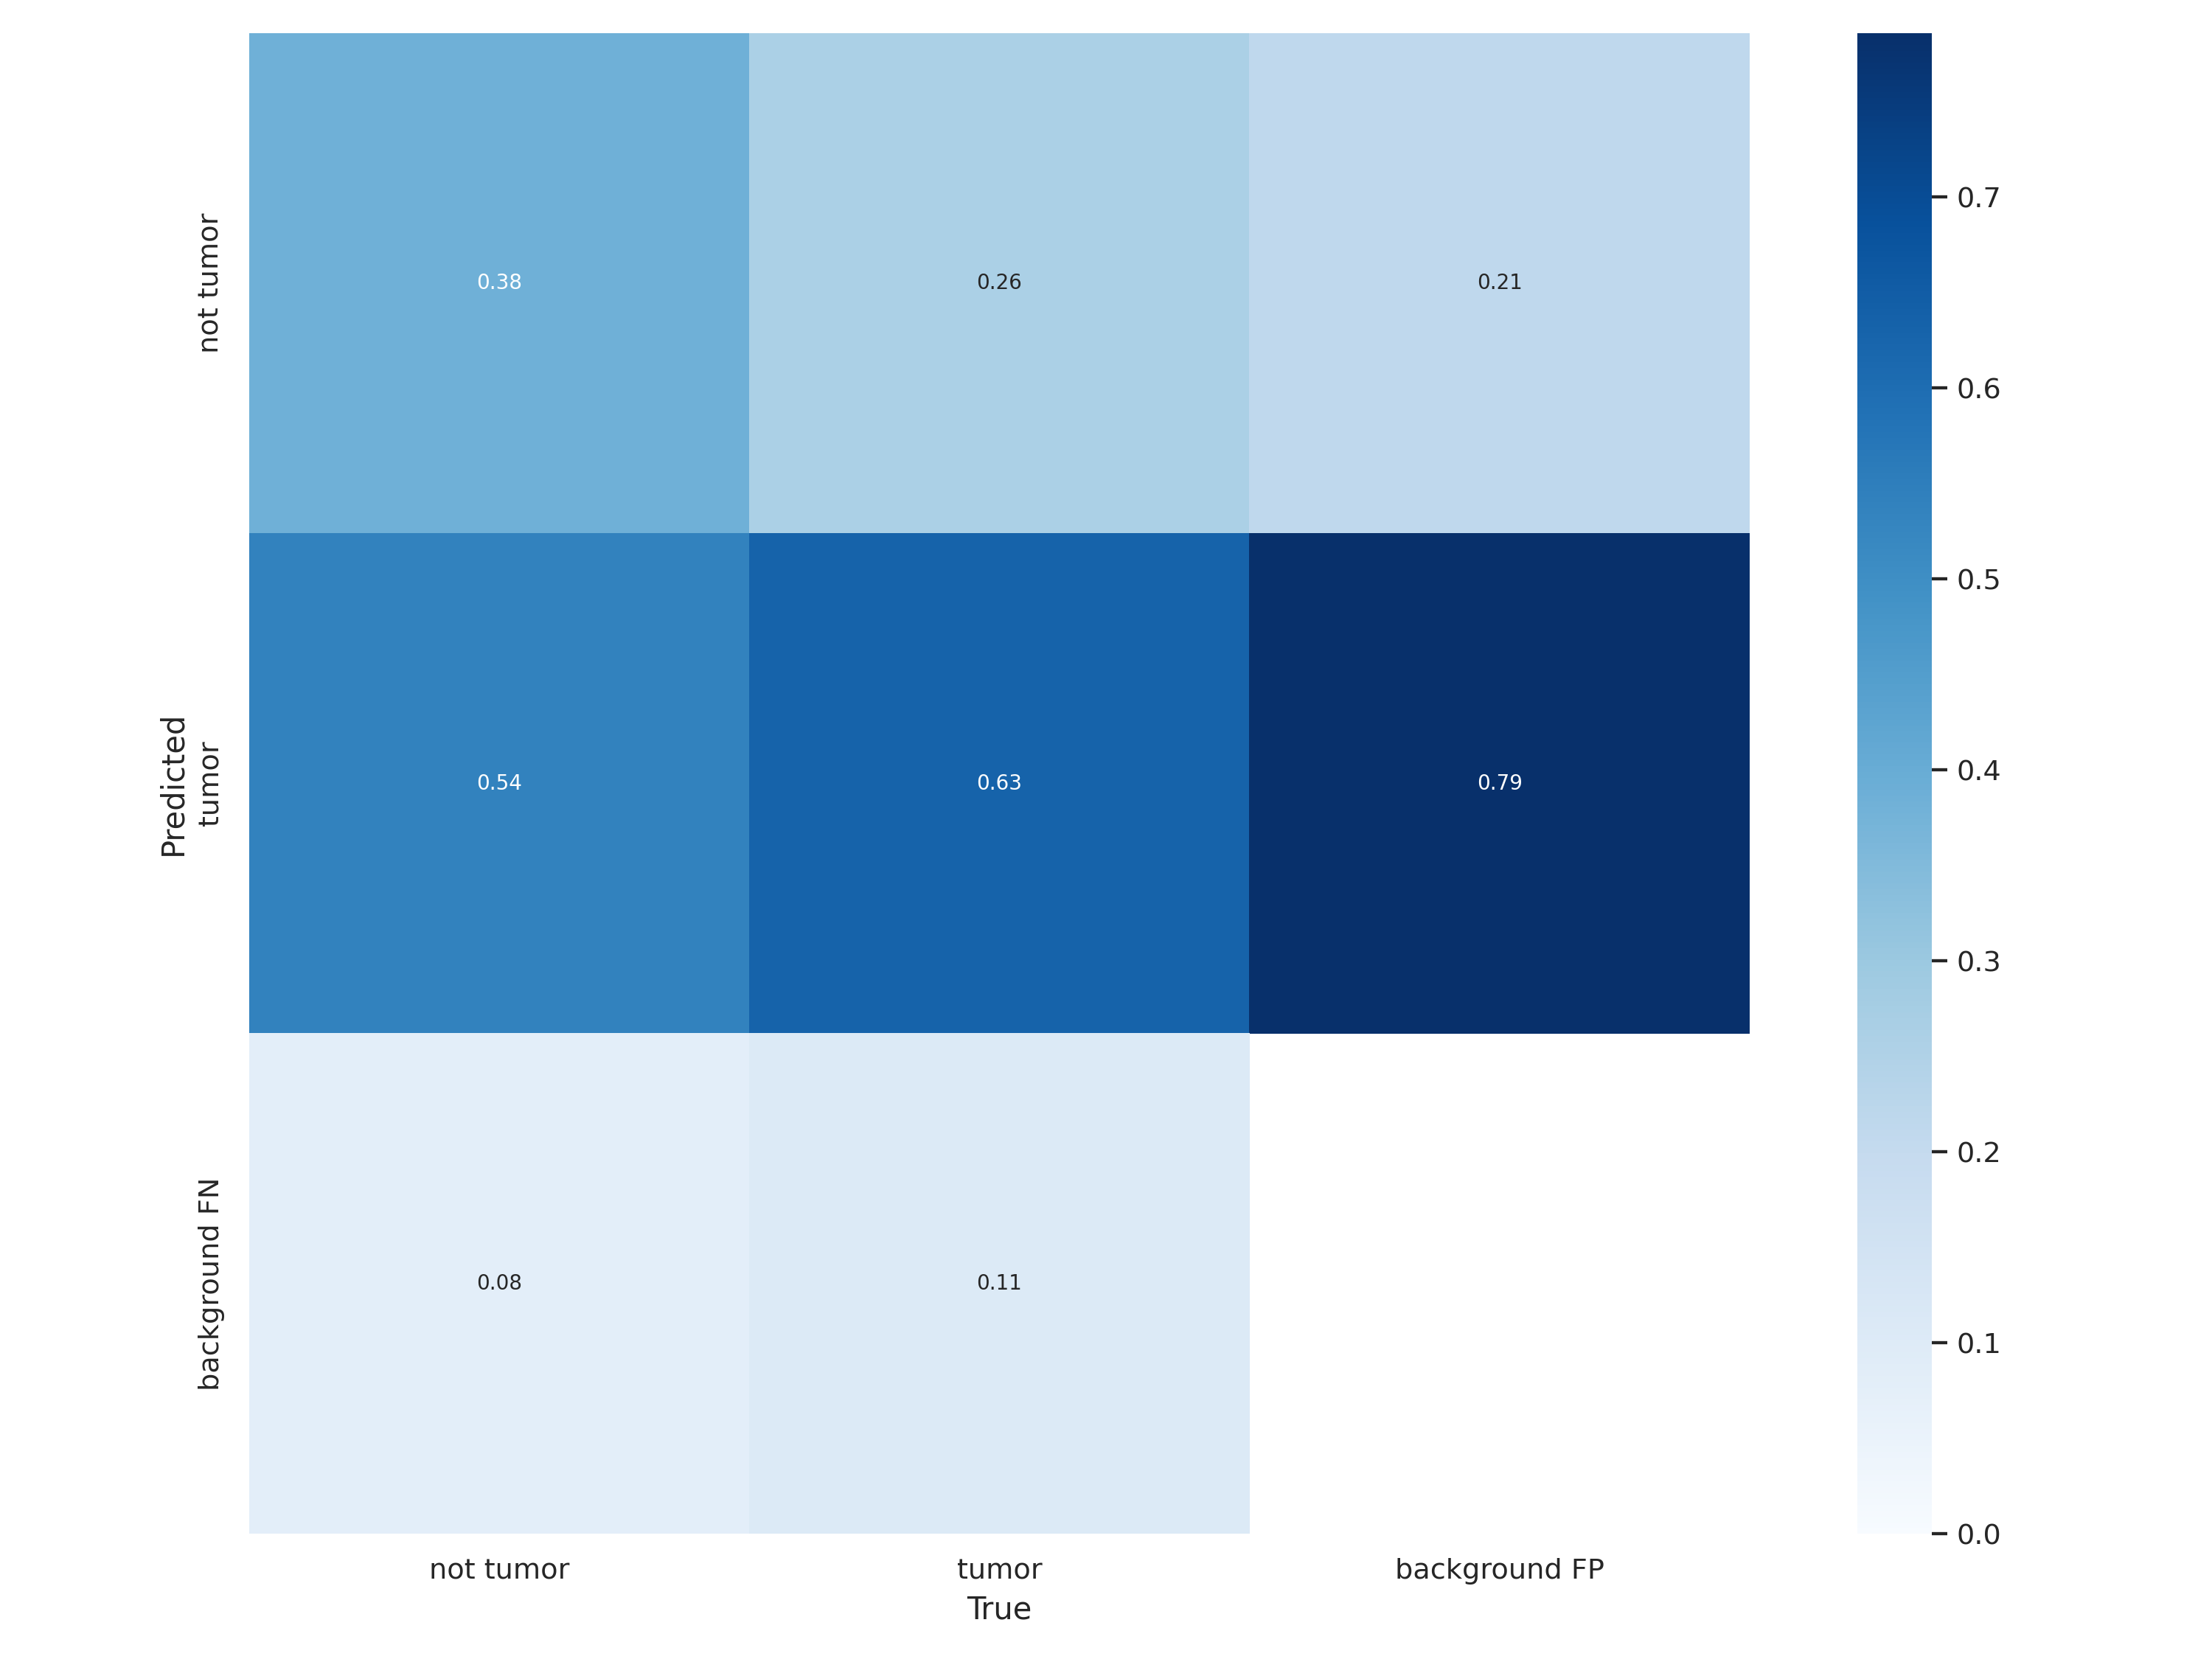

In [20]:
display(Image(filename='yolov5/runs/train/sagittal/confusion_matrix.png'))

### Results

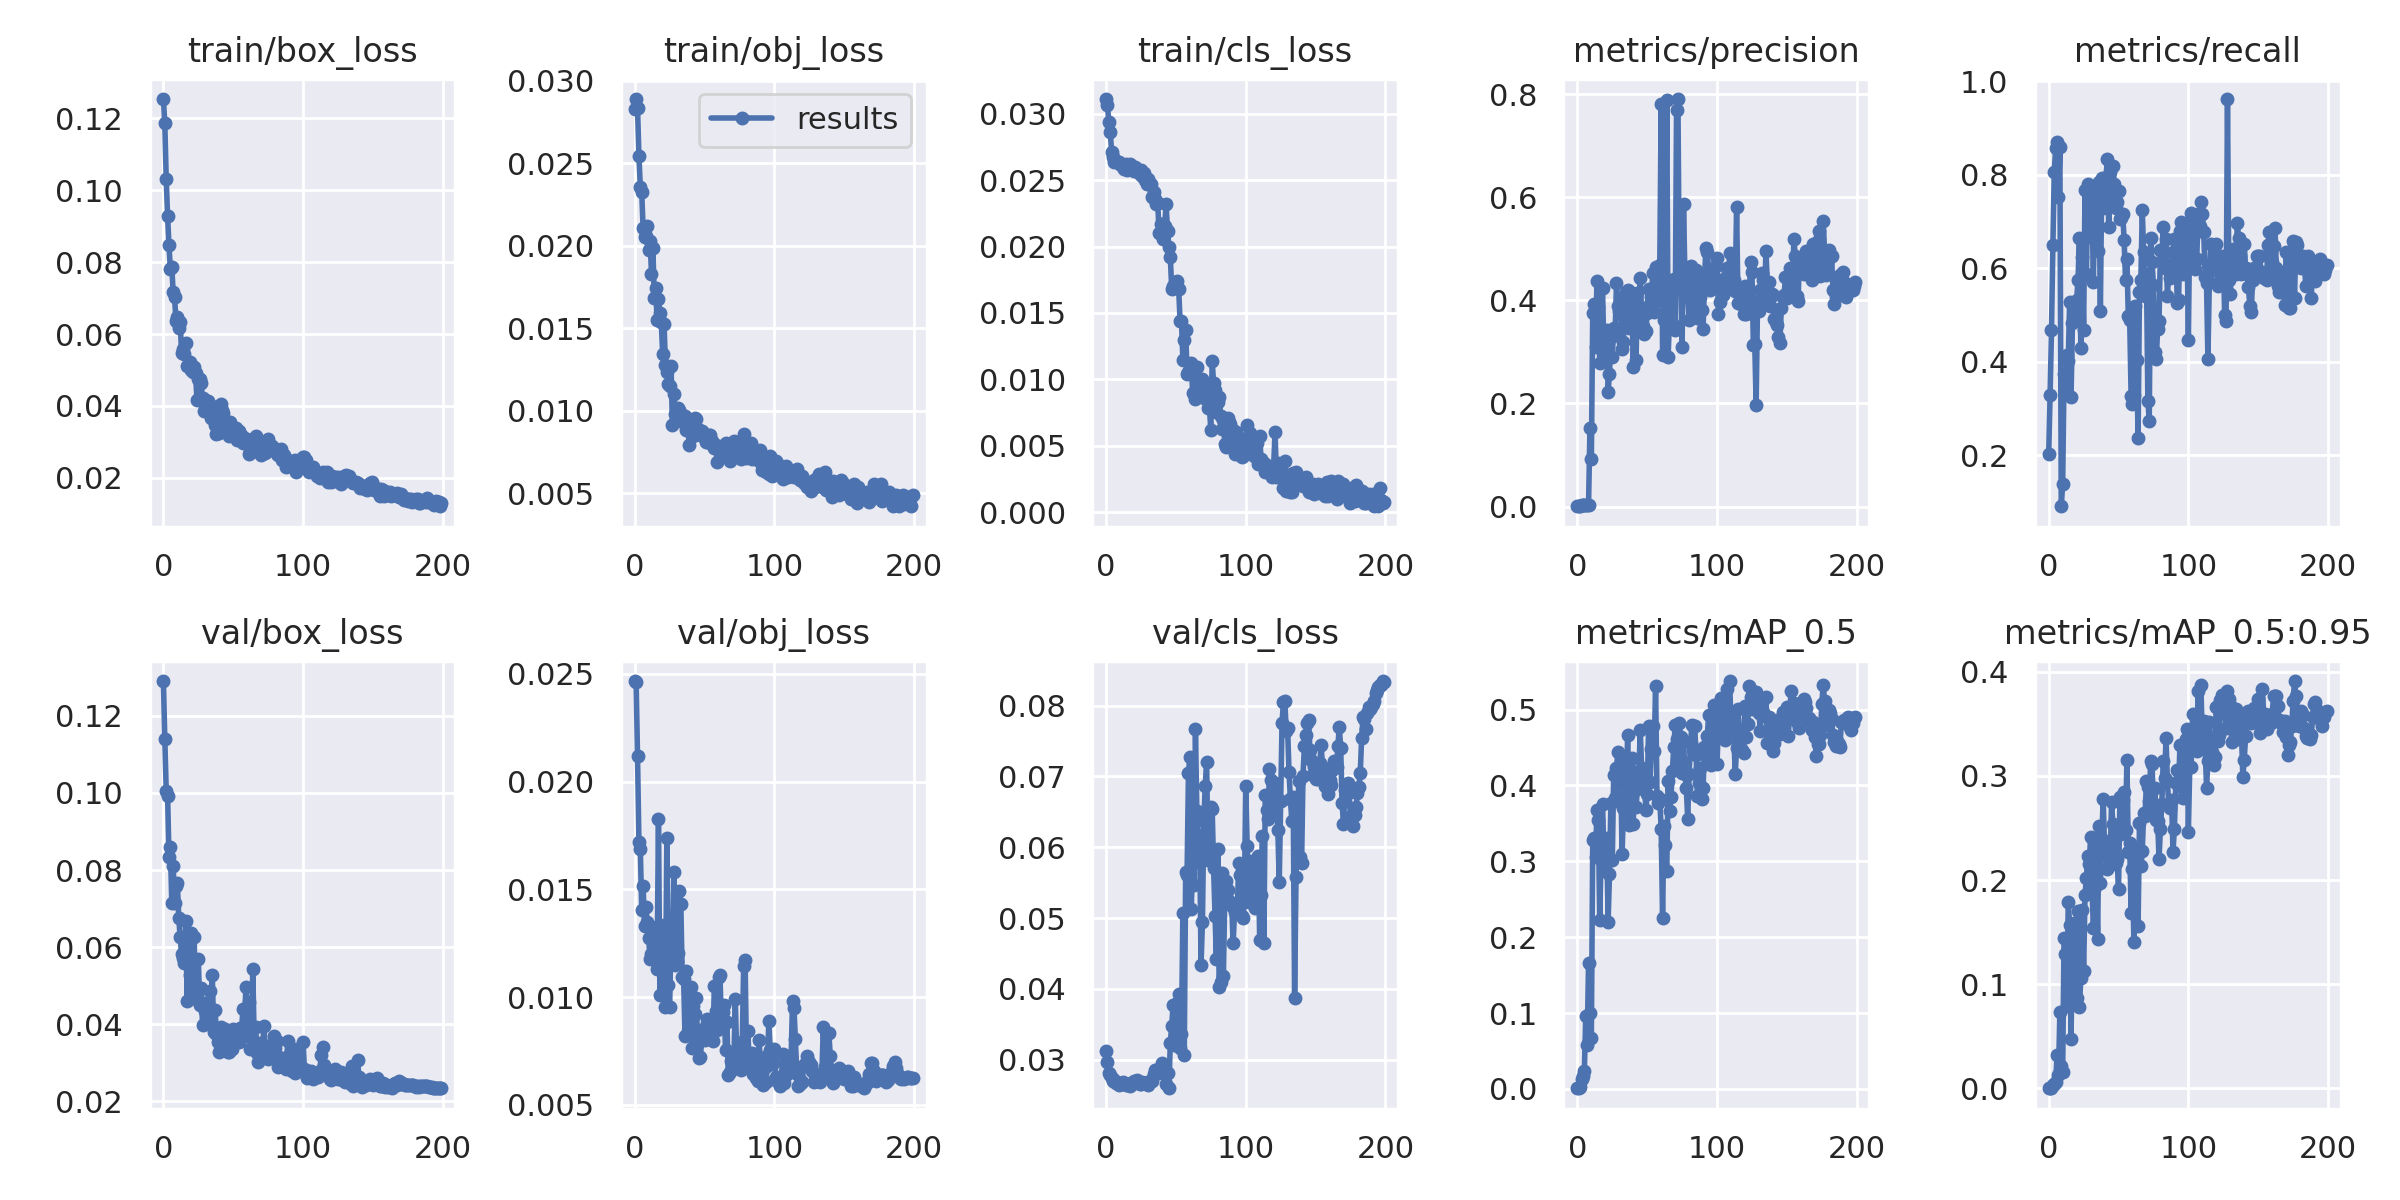

In [21]:
display(Image(filename='yolov5/runs/train/sagittal/results.png'))

# Testing the models

Let's test our models with never seen images during the training.

## Axial Model

detect: weights=['output_models/tumor_detector_axial.pt'], source=https://prod-images-static.radiopaedia.org/images/5651/b510dc0d5cd3906018c4dd49b98643_gallery.jpeg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
100% 29.3k/29.3k [00:00<00:00, 54.5MB/s]
YOLOv5 🚀 v6.1-261-g19f33cb Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients
image 1/1 /content/b510dc0d5cd3906018c4dd49b98643_gallery.jpeg: 640x640 1 tumor, Done. (0.013s)
Speed: 0.7ms pre-process, 12.8ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp
1 labels

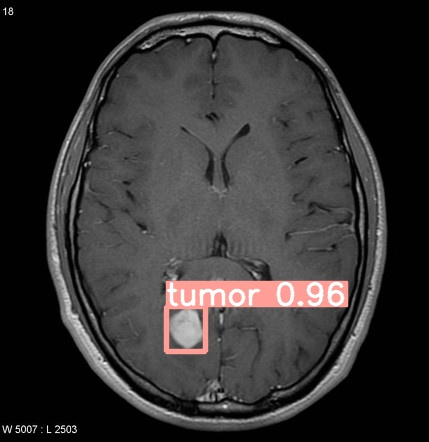

In [22]:
!python yolov5/detect.py --weights output_models/tumor_detector_axial.pt --img 640 --conf 0.4 --source https://prod-images-static.radiopaedia.org/images/5651/b510dc0d5cd3906018c4dd49b98643_gallery.jpeg --save-txt

display(Image(filename='yolov5/runs/detect/exp/b510dc0d5cd3906018c4dd49b98643_gallery.jpeg'))

## Coronal Model

detect: weights=['output_models/tumor_detector_coronal.pt'], source=https://www.mriclinicalcasemap.philips.com/content/images/cases/case154/thumbs/14.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
100% 28.0k/28.0k [00:00<00:00, 1.62MB/s]
YOLOv5 🚀 v6.1-261-g19f33cb Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients
image 1/1 /content/14.jpg: 480x640 1 tumor, Done. (0.023s)
Speed: 0.5ms pre-process, 22.6ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp2
1 labels saved to yolov5/runs/detect/exp2/labels


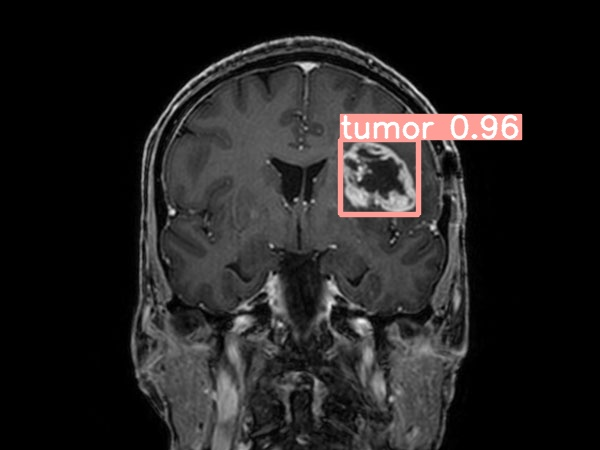

In [23]:
!python yolov5/detect.py --weights output_models/tumor_detector_coronal.pt --img 640 --conf 0.4 --source https://www.mriclinicalcasemap.philips.com/content/images/cases/case154/thumbs/14.jpg --save-txt

display(Image(filename='yolov5/runs/detect/exp2/14.jpg'))

## Sagittal Model

detect: weights=['output_models/tumor_detector_sagittal.pt'], source=https://prod-images-static.radiopaedia.org/images/4440984/10a4749375e20983b677e0502a9d7f_gallery.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
100% 20.1k/20.1k [00:00<00:00, 50.4MB/s]
YOLOv5 🚀 v6.1-261-g19f33cb Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients
image 1/1 /content/10a4749375e20983b677e0502a9d7f_gallery.jpg: 640x640 1 tumor, Done. (0.016s)
Speed: 0.7ms pre-process, 15.6ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp3
1 l

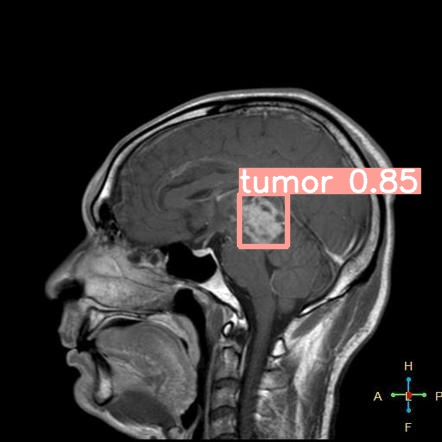

In [24]:
!python yolov5/detect.py --weights output_models/tumor_detector_sagittal.pt --img 640 --conf 0.4 --source https://prod-images-static.radiopaedia.org/images/4440984/10a4749375e20983b677e0502a9d7f_gallery.jpg --save-txt

display(Image(filename='yolov5/runs/detect/exp3/10a4749375e20983b677e0502a9d7f_gallery.jpg'))